# Libraries

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.utils import resample
from scipy import stats
from sklearn.metrics import roc_curve, roc_auc_score, cohen_kappa_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
import lime
import lime.lime_tabular
import shap
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

### *Dataset's Description*
Location - The city's name in Australia.

MinTemp - The minimum temperature recorded for the day in degrees Celsius.

MaxTemp - The maximum temperature reached during the day in degrees Celsius.

Rainfall - Amount of rainfall measured in millimeters for the day.

Evaporation - Water evaporation measured in millimeters for the day.

Sunshine - Duration of bright sunshine in hours for the day.

WindGusDir - The direction from which the strongest gust of wind originated during the day, given in 16 compass points.

WindGuSpeed - Speed of the strongest gust of wind recorded during the day in kilometers per hour.

WindDir9am - Wind direction ten minutes prior to 9 am, measured in compass points.

WindDir3pm - Wind direction ten minutes prior to 3 pm, measured in compass points.

WindSpeed9am - Wind speed ten minutes prior to 9 am in kilometers per hour.

WindSpeed3pm - Wind speed ten minutes prior to 3 pm in kilometers per hour.

Humidity9am - Humidity percentage at 9 am.

Humidity3pm - Humidity percentage at 3 pm.

Pressure9am - Atmospheric pressure in hectopascals at 9 am.

Pressure3pm - Atmospheric pressure in hectopascals at 3 pm.

Cloud9am - Cloud cover in eighths at 9 am.

Cloud3pm - Cloud cover in eighths at 3 pm.

Temp9am - Temperature at 9 am in degrees Celsius.

Temp3pm - Temperature at 3 pm in degrees Celsius.

RainToday - Indicates whether it rained today; 'Yes' if it did, 'No' if it did not.

RainTomorrow - Indicates if it will rain tomorrow; 1 for 'Yes', 0 for 'No'.

In [5]:
df = pd.read_csv('weatherAUS.csv')
df.head().T

0           1           2           3           4
Date           2008-12-01  2008-12-02  2008-12-03  2008-12-04  2008-12-05
Location           Albury      Albury      Albury      Albury      Albury
MinTemp              13.4         7.4        12.9         9.2        17.5
MaxTemp              22.9        25.1        25.7        28.0        32.3
Rainfall              0.6         0.0         0.0         0.0         1.0
Evaporation           NaN         NaN         NaN         NaN         NaN
Sunshine              NaN         NaN         NaN         NaN         NaN
WindGustDir             W         WNW         WSW          NE           W
WindGustSpeed        44.0        44.0        46.0        24.0        41.0
WindDir9am              W         NNW           W          SE         ENE
WindDir3pm            WNW         WSW         WSW           E          NW
WindSpeed9am         20.0         4.0        19.0        11.0         7.0
WindSpeed3pm         24.0        22.0        26.0         9.0        20.0
Humidity9am          71.0        44.0        38.0        45.0        82.0
Humidity3pm          22.0        25.0        30.0        16.0        33.0
Pressure9am        1007.7      1010.6      1007.6      1017.6      1010.8
Pressure3pm        1007.1      1007.8      1008.7      1012.8      1006.0
Cloud9am              8.0         NaN         NaN         NaN         7.0
Cloud3pm              NaN         NaN         2.0         NaN         8.0
Temp9am              16.9        17.2        21.0        18.1        17.8
Temp3pm              21.8        24.3        23.2        26.5        29.7
RainToday              No          No          No          No          No
RainTomorrow           No          No          No          No          No

In [6]:
df.describe().T

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

In [7]:
#Description for categorical columns:
df.describe(include=['object']).T

count unique         top    freq
Date          145460   3436  2013-11-12      49
Location      145460     49    Canberra    3436
WindGustDir   135134     16           W    9915
WindDir9am    134894     16           N   11758
WindDir3pm    141232     16          SE   10838
RainToday     142199      2          No  110319
RainTomorrow  142193      2          No  110316

In [8]:
data_temp = df.copy()

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
# rows and columns
df.shape

(145460, 23)

## *Class Imbalance*

In [13]:
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [14]:
df['RainTomorrow'].value_counts()

RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64

In [15]:
# Percentage of distribution of values (1s and 0s)
df['RainTomorrow'].value_counts() / len(df) * 100

RainTomorrow
0.0    75.839406
1.0    21.914616
Name: count, dtype: float64

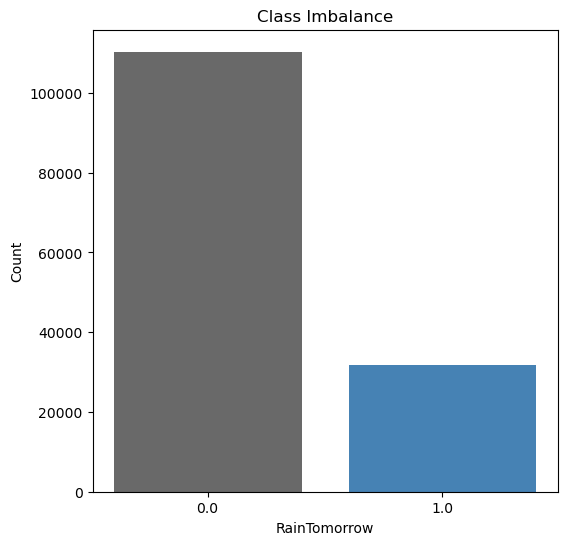

In [16]:
#There is a great class imbalance in our target variable

# Counts of each category
counts = df['RainTomorrow'].value_counts()

# Visualization
plt.figure(figsize=(6, 6))
plt.bar(counts.index.astype(str), counts.values, color=['dimgray', 'steelblue'])
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.show()

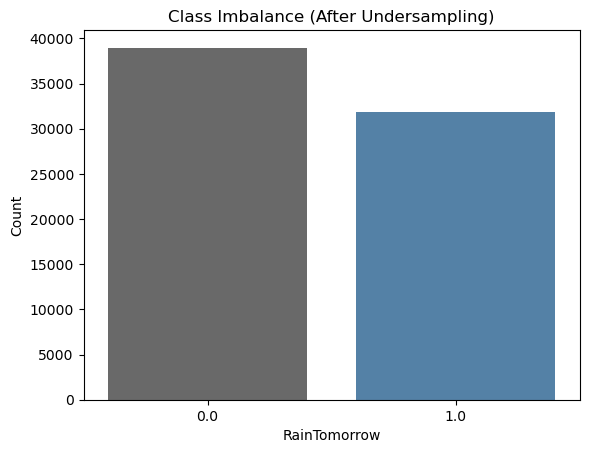

In [17]:
yes = df[df['RainTomorrow'] == 1]
no = df[df['RainTomorrow'] == 0]

desired_ratio = 0.45

# Calculate the number of samples to undersample from the majority class
num_to_sample = int(len(yes) / desired_ratio - len(yes))

# Undersampling the majority class (no)
no_undersampled = resample(no, replace=False, n_samples=num_to_sample, random_state=123)

# Combining
df_balanced = pd.concat([no_undersampled, yes])

# Visualization
sns.countplot(data=df_balanced, x='RainTomorrow', palette=['dimgray', 'steelblue'])
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Class Imbalance (After Undersampling)')
plt.show()

In [18]:
# Percentage of distribution of values (1s and 0s)
df_balanced['RainTomorrow'].value_counts() / len(df_balanced) * 100

RainTomorrow
0.0    54.999506
1.0    45.000494
Name: count, dtype: float64

In [19]:
df_balanced.shape

(70837, 23)

# Pre-Processing

## *Missing Values*

In [20]:
df_balanced.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            151
Rainfall           951
Evaporation      30564
Sunshine         33641
WindGustDir       4914
WindGustSpeed     4879
WindDir9am        4700
WindDir3pm        2014
WindSpeed9am       716
WindSpeed3pm      1386
Humidity9am        933
Humidity3pm       1864
Pressure9am       6933
Pressure3pm       6943
Cloud9am         26203
Cloud3pm         27631
Temp9am            497
Temp3pm           1427
RainToday          951
RainTomorrow         0
dtype: int64

In [21]:
# Fill numerical columns with median. Mean is too sensitive thus median is used

for col in df_balanced.select_dtypes(['float64'], ['int']):
    df_balanced[col] = df_balanced[col].fillna(df_balanced[col].median())

# Fill categorical columns with mode

for col in df_balanced.select_dtypes(include=['object']).columns:
    df_balanced[col] = df_balanced[col].fillna(df_balanced[col].mode()[0])

In [22]:
df_balanced.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [23]:
df_balanced.isnull().sum().sum()

0

### *Catering for Outliers, Encoding and Scaling*

In [24]:
# for categorical and numerical attributes

In [25]:
# Categorical variables
categorical = [x for x in df_balanced.columns if df_balanced[x].dtype == 'object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are:', categorical)

# Unique values for each categorical variable
for x in categorical:
    unique_vals = df_balanced[x].unique()
    num_unique = len(unique_vals)
    print(f"\n{x} has {num_unique} unique values:")
    print(unique_vals)


There are 5 categorical variables

The categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

Date has 3342 unique values:
['2017-03-07' '2012-01-09' '2015-05-15' ... '2008-08-12' '2008-07-13'
 '2008-09-21']

Location has 49 unique values:
['WaggaWagga' 'GoldCoast' 'Dartmoor' 'AliceSprings' 'Canberra' 'Sydney'
 'Tuggeranong' 'Cobar' 'BadgerysCreek' 'CoffsHarbour' 'MountGinini'
 'Portland' 'Penrith' 'Perth' 'MelbourneAirport' 'SalmonGums' 'Mildura'
 'Moree' 'Darwin' 'Launceston' 'Townsville' 'Nuriootpa' 'Newcastle'
 'PearceRAAF' 'Adelaide' 'NorfolkIsland' 'PerthAirport' 'Williamtown'
 'NorahHead' 'Cairns' 'Sale' 'Ballarat' 'MountGambier' 'Hobart' 'Richmond'
 'Walpole' 'Woomera' 'Brisbane' 'Wollongong' 'Melbourne' 'Albany'
 'Bendigo' 'SydneyAirport' 'Albury' 'Katherine' 'Witchcliffe' 'Watsonia'
 'Nhil' 'Uluru']

WindGustDir has 16 unique values:
['NE' 'N' 'SSE' 'ESE' 'NW' 'W' 'NNE' 'ENE' 'SSW' 'NNW' 'WNW' 'E' 'WSW'
 'SE' 'SW' 'S']

WindDir9am has 16 u

In [26]:
# Numerical variables
numerical = [var for var in df_balanced.columns if df_balanced[var].dtype in ['float64', 'int64']]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:', numerical)

There are 18 numerical variables

The numerical variables are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


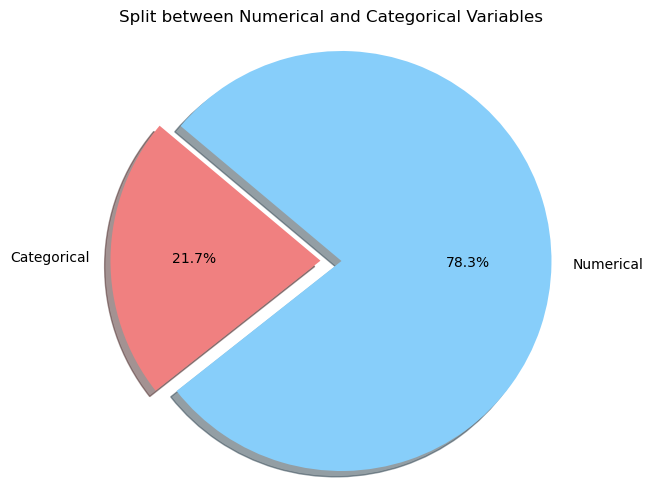

In [27]:
num_categorical = len(categorical)
num_numerical = len(numerical)
total_vars = num_categorical + num_numerical

# Pie chart
labels = ['Categorical', 'Numerical']
sizes = [num_categorical, num_numerical]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Split between Numerical and Categorical Variables')
plt.axis('equal') 
plt.show()

In [28]:
# Catering date column first

df_balanced['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)

print(df_balanced['Date'].dtype)

datetime64[ns, UTC]


In [29]:
df_balanced['Year'] = df_balanced['Date'].dt.year
df_balanced['Month'] = df_balanced['Date'].dt.month
df_balanced['Day'] = df_balanced['Date'].dt.day

In [30]:
def assign_season(month):
    if month in [6, 7, 8]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Summer'
    else:
        return 'Spring'

# Create season column(would help in visualizations)
df_balanced['Season'] = df_balanced['Month'].apply(assign_season)

In [31]:
df_balanced.drop('Date', axis=1, inplace = True)

df_balanced.tail()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
145324    Uluru     24.8     39.8       0.4          4.4       7.1   
145390    Uluru     19.3     24.4       0.0          4.4       7.1   
145391    Uluru     15.2     21.5       6.8          4.4       7.1   
145392    Uluru     17.7     26.9      12.6          4.4       7.1   
145393    Uluru     18.6     28.6      34.6          4.4       7.1   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  \
145324         WNW           65.0          E        ENE  ...       6.0   
145390           W           35.0        ESE        SSE  ...       8.0   
145391         ENE           30.0         NE        ENE  ...       3.0   
145392           S           35.0          E        SSW  ...       7.0   
145393           E           46.0          E          E  ...       8.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  \
145324       6.0     31.5     36.6        0.0           1.0  2017      2   10   
145390       8.0     21.3     18.5        0.0           1.0  2017      4   17   
145391       8.0     19.0     21.2        1.0           1.0  2017      4   18   
145392       8.0     19.0     26.0        1.0           1.0  2017      4   19   
145393       5.0     19.8     26.9        1.0           1.0  2017      4   20   

        Season  
145324  Summer  
145390  Autumn  
145391  Autumn  
145392  Autumn  
145393  Autumn  

[5 rows x 26 columns]

In [32]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70837 entries, 39427 to 145393
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       70837 non-null  object 
 1   MinTemp        70837 non-null  float64
 2   MaxTemp        70837 non-null  float64
 3   Rainfall       70837 non-null  float64
 4   Evaporation    70837 non-null  float64
 5   Sunshine       70837 non-null  float64
 6   WindGustDir    70837 non-null  object 
 7   WindGustSpeed  70837 non-null  float64
 8   WindDir9am     70837 non-null  object 
 9   WindDir3pm     70837 non-null  object 
 10  WindSpeed9am   70837 non-null  float64
 11  WindSpeed3pm   70837 non-null  float64
 12  Humidity9am    70837 non-null  float64
 13  Humidity3pm    70837 non-null  float64
 14  Pressure9am    70837 non-null  float64
 15  Pressure3pm    70837 non-null  float64
 16  Cloud9am       70837 non-null  float64
 17  Cloud3pm       70837 non-null  float64
 18  Temp9a

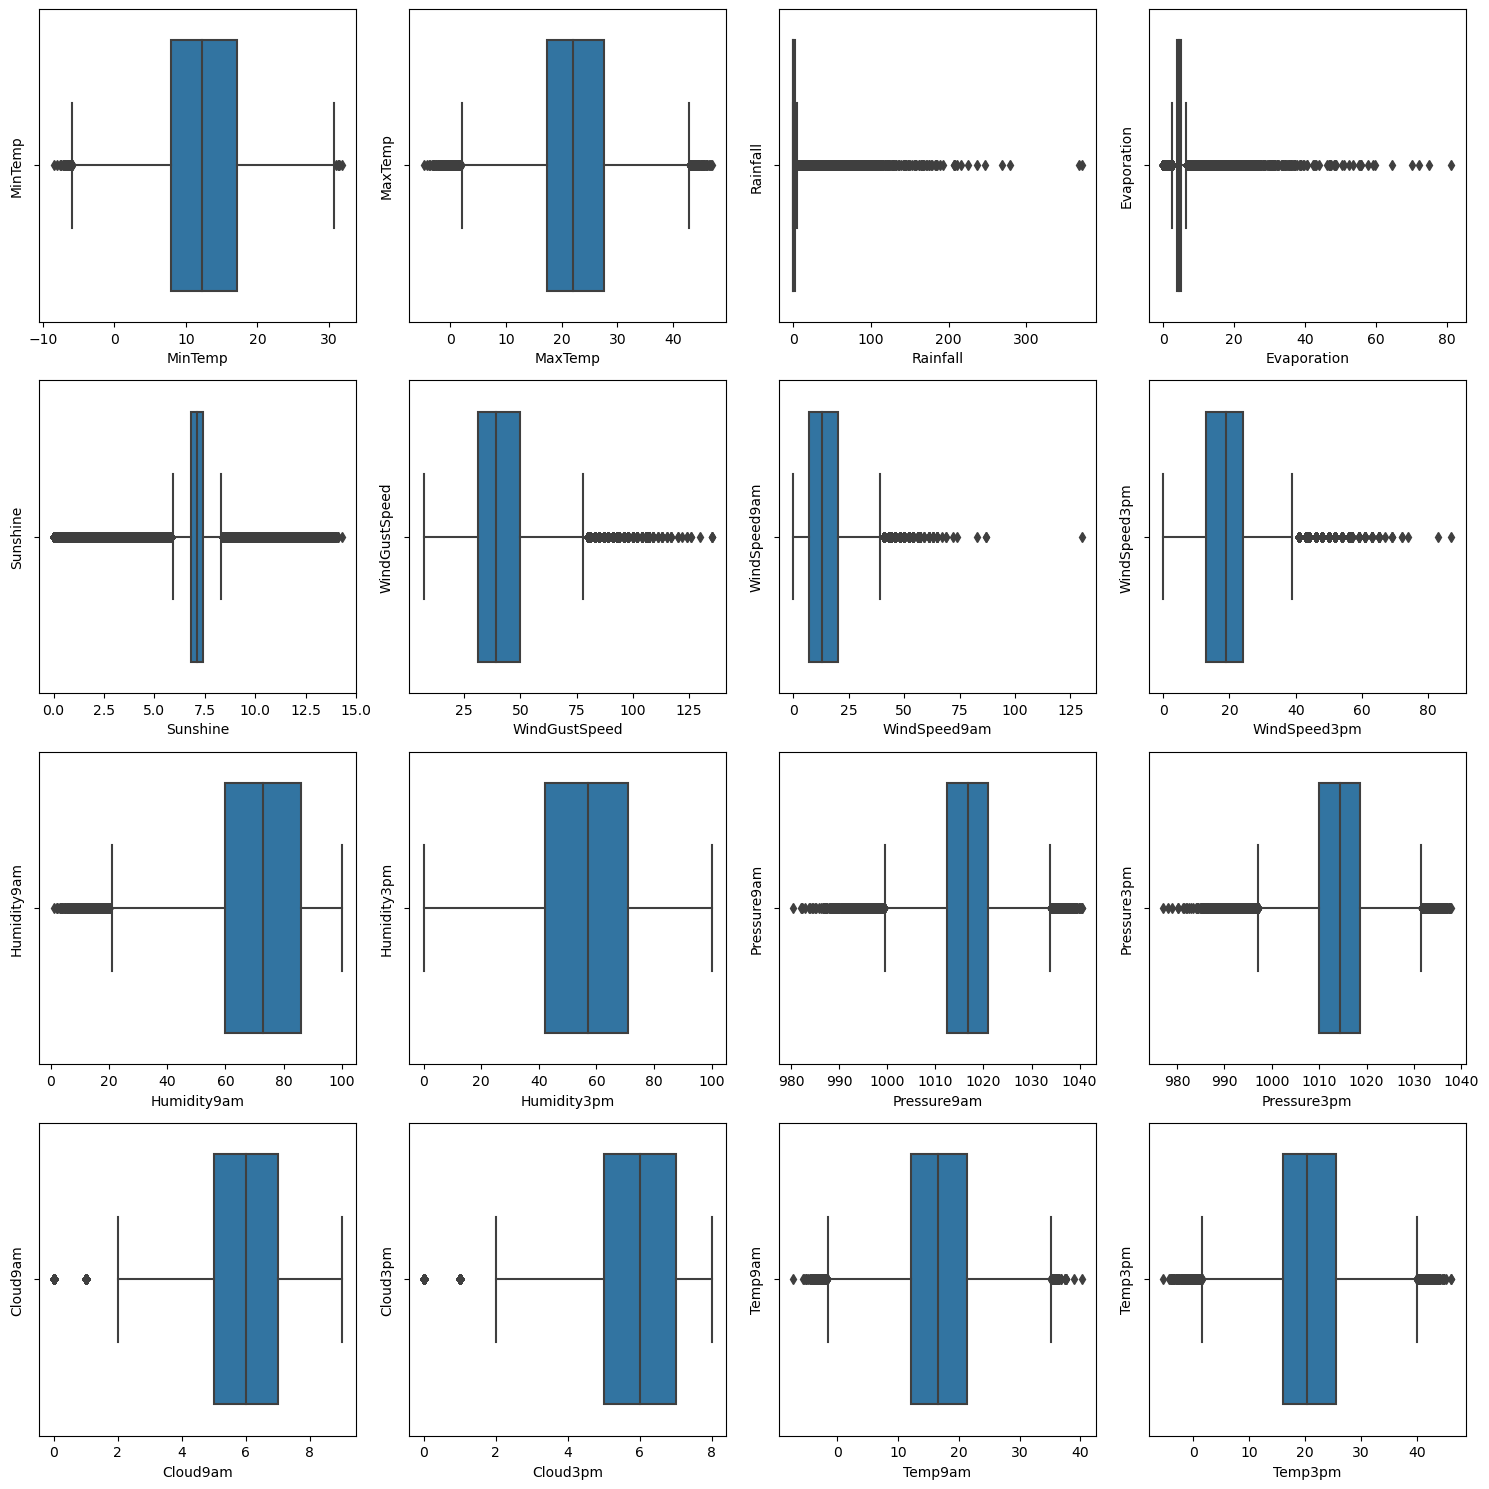

In [33]:
# Select numerical columns for outlier detection
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 
                  'Cloud3pm', 'Temp9am', 'Temp3pm']
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot box plots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[i], data=df_balanced, x=col)
    axes[i].set_title('')
    axes[i].set_ylabel(col)

# Remove extra subplots and adjust layout
for ax in axes[len(numerical_cols):]:
    ax.remove()
plt.tight_layout()
plt.show()

In [34]:
# Calculate z-scores for numerical columns
z_scores = stats.zscore(df_balanced[numerical_cols])

# Define threshold for z-score (e.g., absolute z-score > 3 as outlier)
threshold = 3

# Identify outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Filter rows without outliers
df_cleaned = df_balanced[~outlier_indices]

# Check the shape before and after outlier removal
print("Shape before outlier removal:", df_balanced.shape)
print("Shape after outlier removal:", df_cleaned.shape)

Shape before outlier removal: (70837, 26)
Shape after outlier removal: (66287, 26)


In [35]:
df_cleaned.head(2)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
39427  WaggaWagga     14.9     29.3       0.0          7.8       7.1   
91344   GoldCoast     23.8     31.4       0.0          4.4       7.1   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  \
39427          NE           41.0        ENE         SE  ...       6.0   
91344           N           44.0          N        NNE  ...       6.0   

       Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  \
39427       6.0     19.5     27.9        0.0           0.0  2017      3    7   
91344       6.0     27.4     28.1        0.0           0.0  2012      1    9   

       Season  
39427  Autumn  
91344  Summer  

[2 rows x 26 columns]

In [36]:
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','Season']


# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned.loc[:, col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Apply Min-Max Scaling to numerical columns
scaler = MinMaxScaler()
df_cleaned.loc[:, numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Check the updated DataFrame with label encoding and scaling applied
df_cleaned.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
39427        42  0.565789  0.656471  0.000000     0.561151  0.496503   
91344        14  0.800000  0.705882  0.000000     0.316547  0.496503   
138239        3  0.578947  0.764706  0.000000     0.978417  0.895105   
48271         9  0.152632  0.296471  0.028409     0.316547  0.496503   
31379        37  0.434211  0.383529  0.000000     0.258993  0.685315   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  \
39427            4       0.447368          1          9  ...  0.666667   
91344            3       0.486842          3          5  ...  0.666667   
138239           2       0.368421          0          0  ...  0.000000   
48271            7       0.157895          3         14  ...  0.777778   
31379           13       0.618421         13         13  ...  0.666667   

        Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  Year  Month  \
39427      0.750  0.566580  0.669100        0.0           0.0  2017      3   
91344      0.750  0.772846  0.673966        0.0           0.0  2012      1   
138239     0.125  0.754569  0.773723        0.0           0.0  2015      2   
48271      0.750  0.182768  0.326034        0.0           0.0  2015      6   
31379      0.750  0.352480  0.403893        0.0           0.0  2011      6   

        Day  Season  
39427     7       0  
91344     9       2  
138239    5       2  
48271     5       3  
31379    18       3  

[5 rows x 26 columns]

In [37]:
# I want the target to come at the end so changing the sequence of the dataframe

# Current sequence of columns
current_sequence = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                    'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                    'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day',
                    'Season']

# 'RainToday' and 'RainTomorrow' at the end
new_sequence = [col for col in current_sequence if col not in ['RainToday', 'RainTomorrow']]
new_sequence += ['RainToday', 'RainTomorrow']

# Reindex
df_cleaned = df_cleaned.reindex(columns=new_sequence)

# Updated DataFrame 
df_cleaned.tail(3)

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
145391       41  0.573684  0.472941  0.193182     0.316547  0.496503   
145392       41  0.639474  0.600000  0.357955     0.316547  0.496503   
145393       41  0.663158  0.640000  0.982955     0.316547  0.496503   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  \
145391           1       0.302632          4          1  ...  0.333333   
145392           8       0.368421          0         11  ...  0.777778   
145393           0       0.513158          0          0  ...  0.888889   

        Cloud3pm   Temp9am   Temp3pm  Year  Month  Day  Season  RainToday  \
145391     1.000  0.553525  0.506083  2017      4   18       0        1.0   
145392     1.000  0.553525  0.622871  2017      4   19       0        1.0   
145393     0.625  0.574413  0.644769  2017      4   20       0        1.0   

        RainTomorrow  
145391           1.0  
145392           1.0  
145393           1.0  

[3 rows x 26 columns]

### *Correlation Matrix*

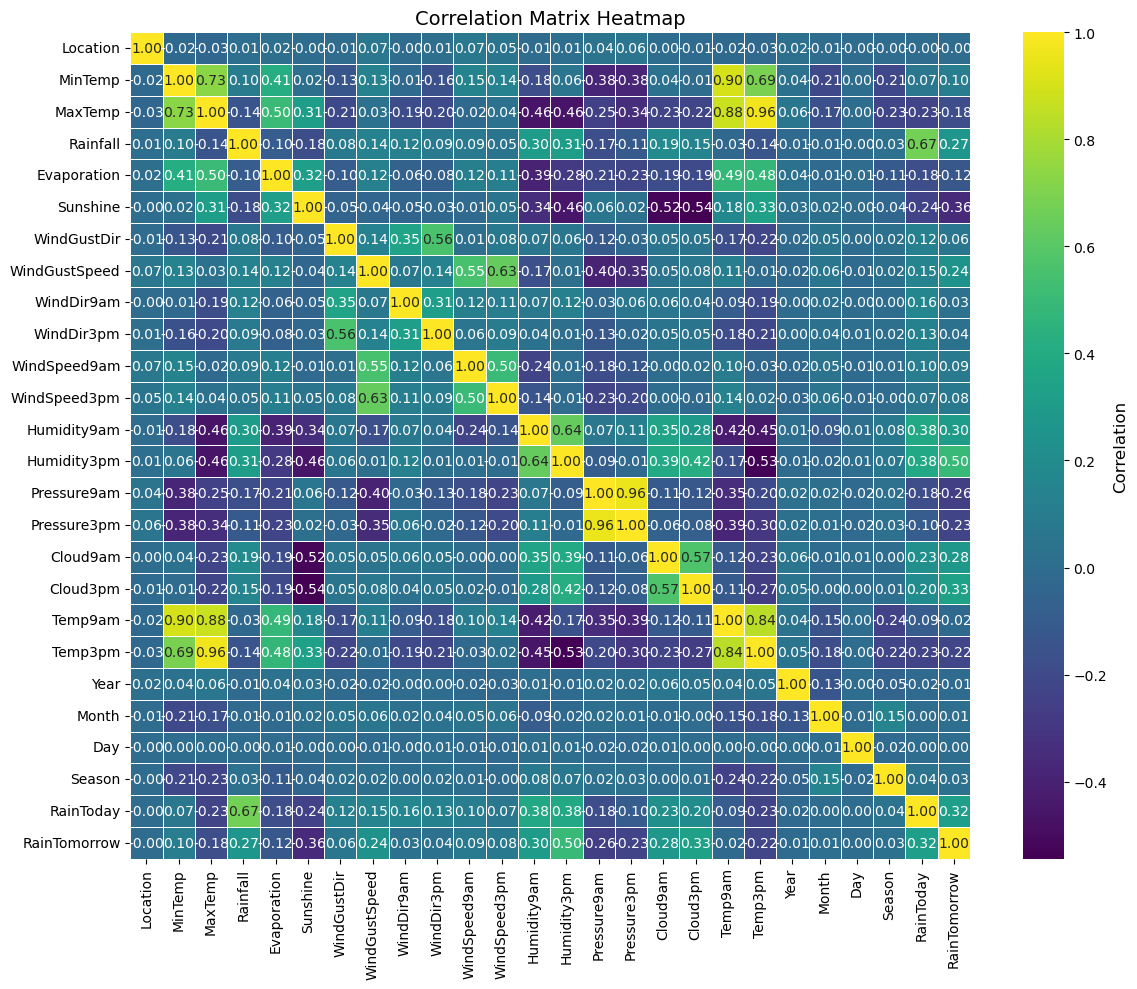

In [37]:
# Multi-collinearity
# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Correlation', fontsize=12)

plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

# Visualizations

### *RainFall over the Years*

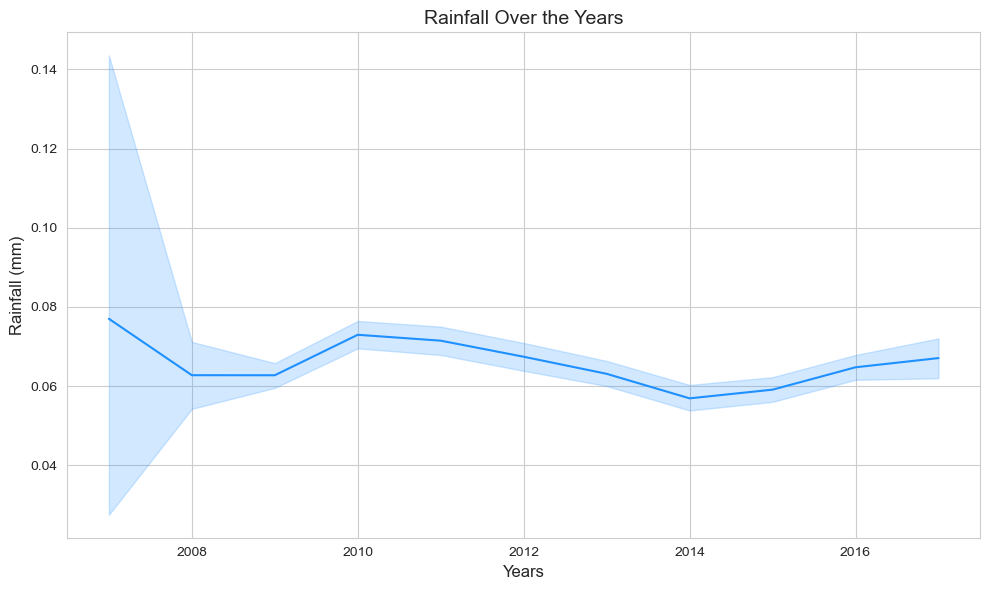

In [38]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
Time_series = sns.lineplot(x="Year", y="Rainfall", data=df_cleaned, color='#1E90FF')

Time_series.set_title("Rainfall Over the Years", fontsize=14)
Time_series.set_ylabel("Rainfall (mm)", fontsize=12)
Time_series.set_xlabel("Years", fontsize=12)

plt.tight_layout()
plt.show()

### *Monthly RainFall*

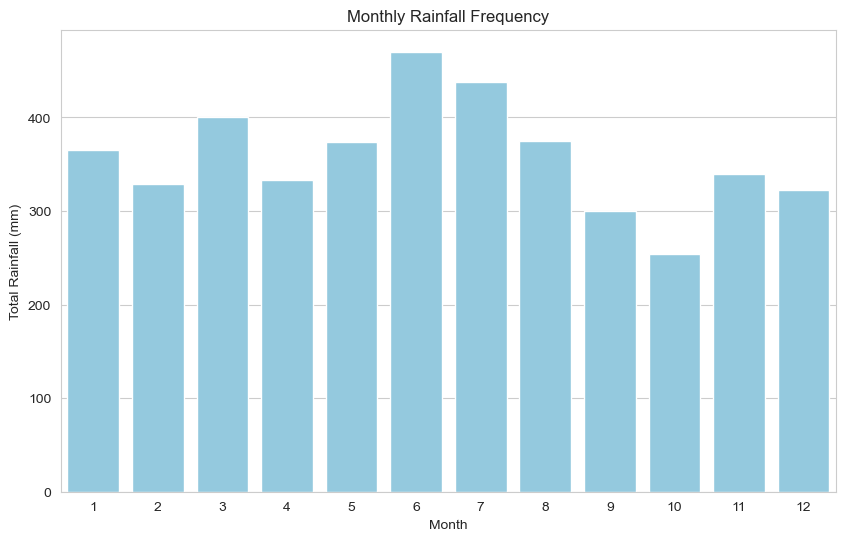

In [39]:
monthly_rainfall = df_cleaned.groupby('Month')['Rainfall'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=monthly_rainfall, x='Month', y='Rainfall', color='skyblue')

# Labels and title
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Monthly Rainfall Frequency')

plt.show()

### *Monthly Sunshine* 

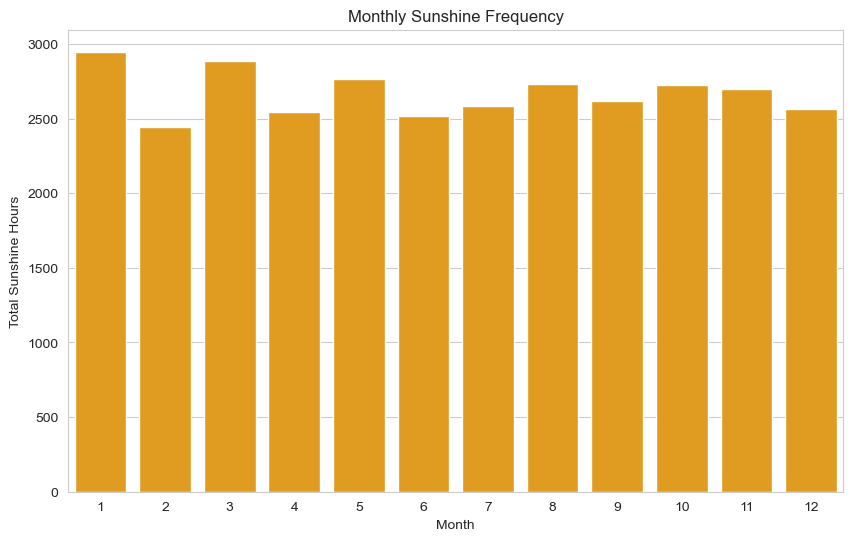

In [40]:
monthly_sunshine = df_cleaned.groupby('Month')['Sunshine'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar plot using Seaborn
sns.barplot(data=monthly_sunshine, x='Month', y='Sunshine', color='orange')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Sunshine Hours')
plt.title('Monthly Sunshine Frequency')

# Show plot
plt.show()

### *PairPlot*

In [41]:
import warnings
warnings.filterwarnings("ignore")

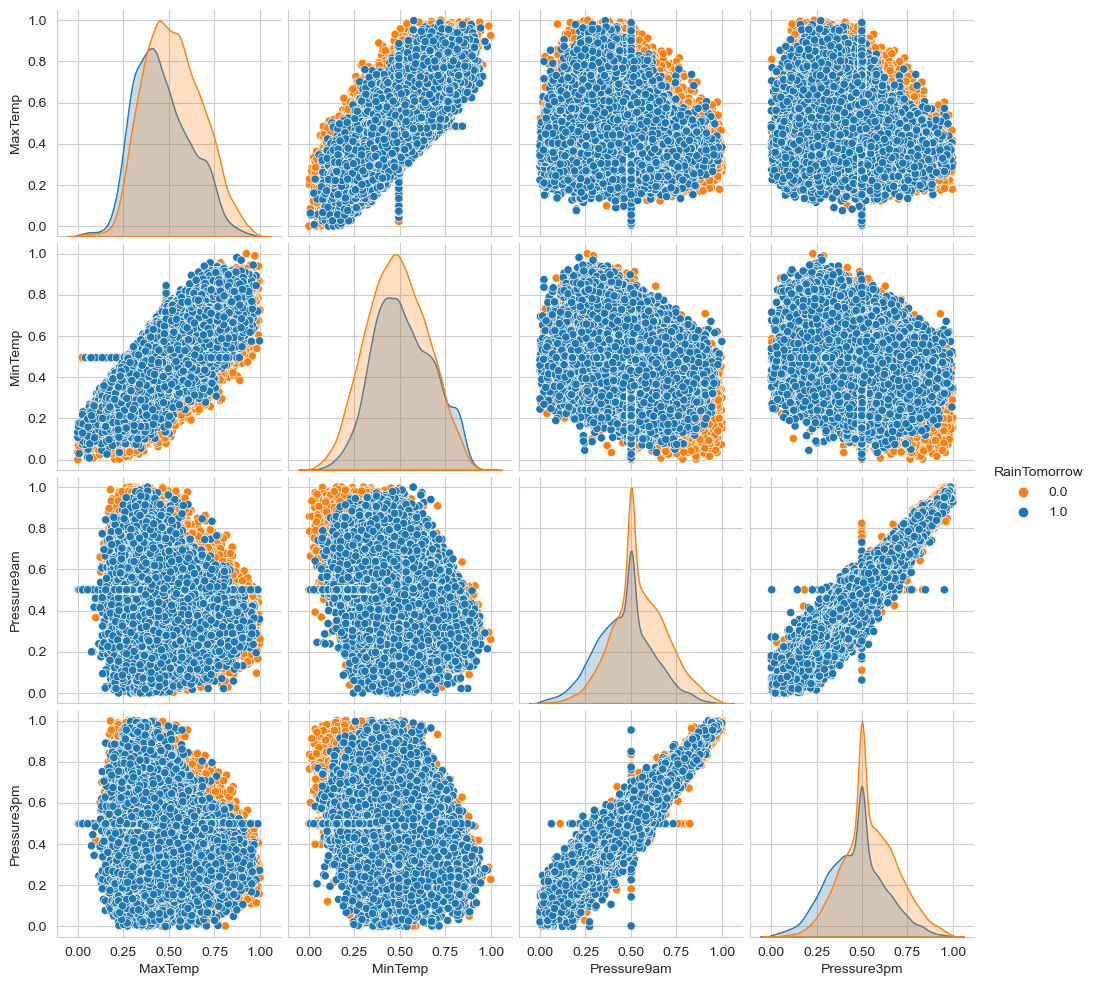

In [71]:
custom_palette = {1 : '#1f77b4', 0: '#ff7f0e'}

sns.pairplot(data=df_cleaned, vars=['MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm'], hue='RainTomorrow', palette=custom_palette)
plt.show()

### *RainFall at different Locations*

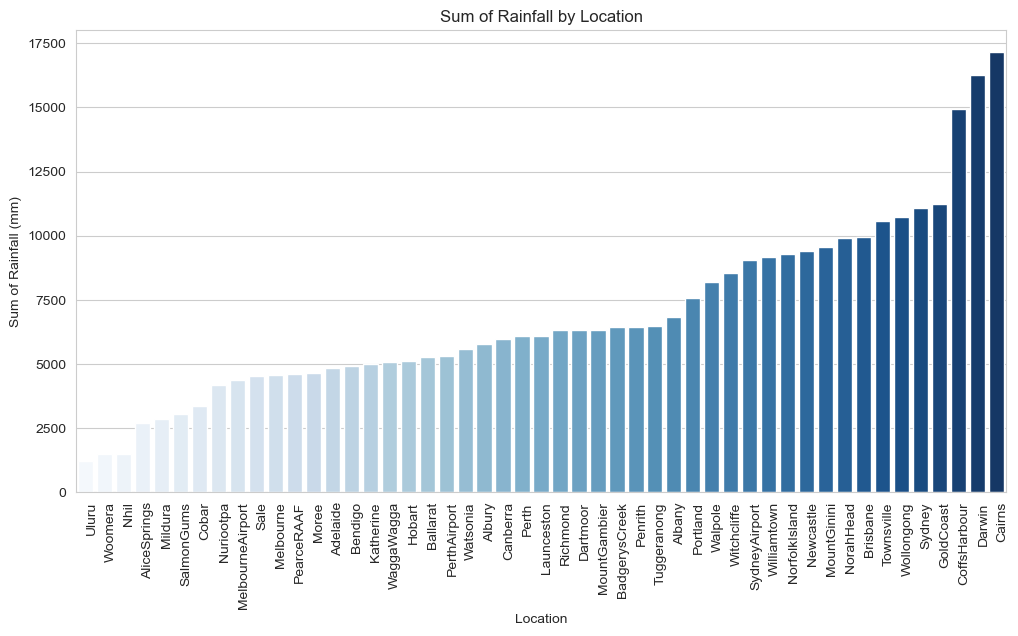

In [42]:
rainfall_by_location = data_temp.groupby('Location')['Rainfall'].sum().sort_values().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(data=rainfall_by_location, x='Location', y='Rainfall', palette='Blues')

# Labels and title
plt.xlabel('Location')
plt.ylabel('Sum of Rainfall (mm)')
plt.title('Sum of Rainfall by Location')
plt.xticks(rotation=90, ha='left')
plt.show()

We find out the sequence of cities with respect to the amount of rainfall.
Uluru, Woomera, and Nhil were found to be the cities with the least Rainfall while 
Darwin and Cairns were found to have the most Rainfall

### *RainFall in different Seasons*

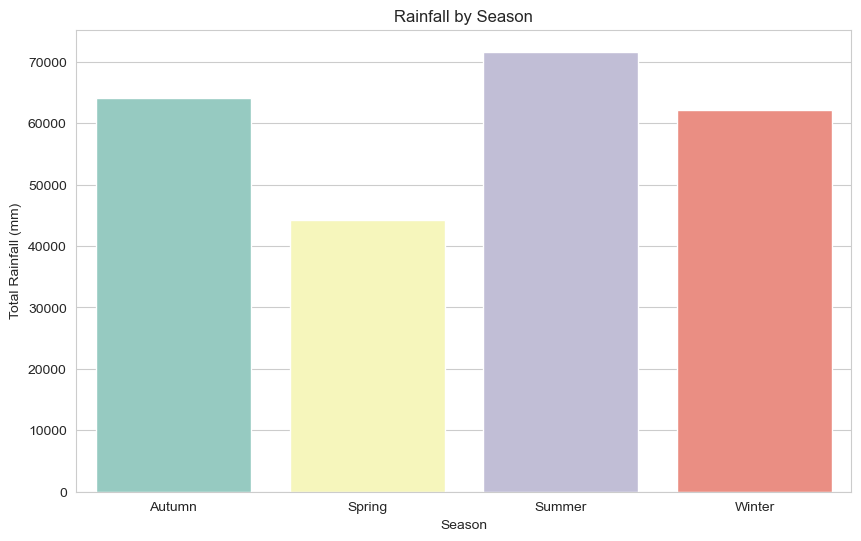

In [43]:
# Calculate total rainfall by season
rainfall_by_season = df_balanced.groupby('Season')['Rainfall'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar plot using Seaborn
sns.barplot(data=rainfall_by_season, x='Season', y='Rainfall', palette='Set3')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Rainfall (mm)')
plt.title('Rainfall by Season')

# Show plot
plt.show()

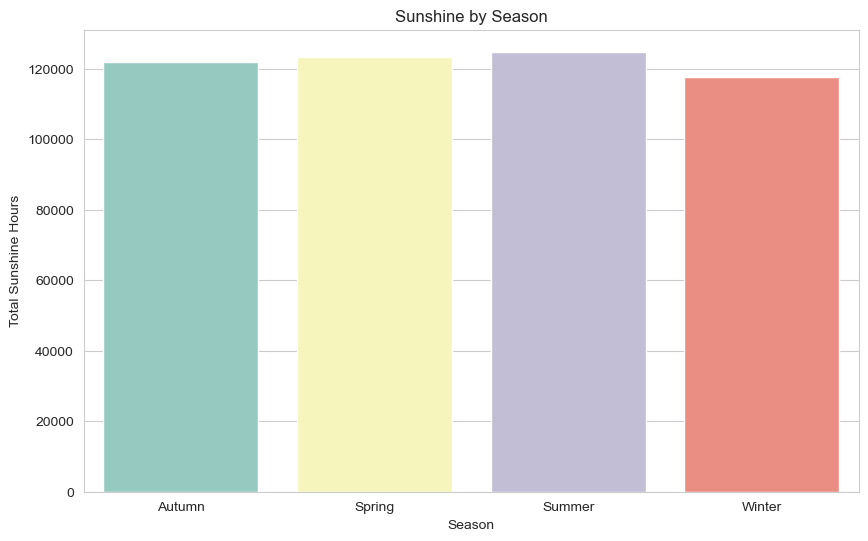

In [44]:
# Calculate total sunshine hours by season
sunshine_by_season = df_balanced.groupby('Season')['Sunshine'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar plot using Seaborn
sns.barplot(data=sunshine_by_season, x='Season', y='Sunshine', palette='Set3')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Sunshine Hours')
plt.title('Sunshine by Season')

# Show plot
plt.show()

### *Wind at different times*

<Figure size 1200x800 with 0 Axes>

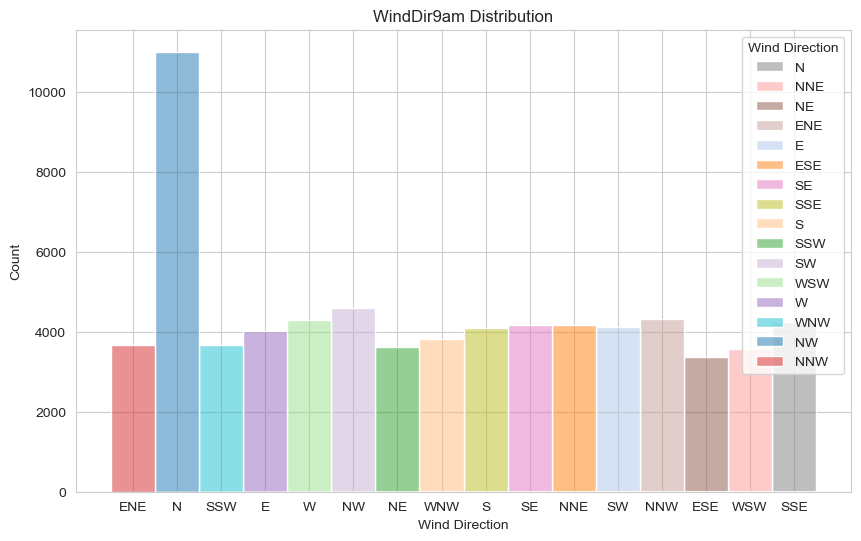

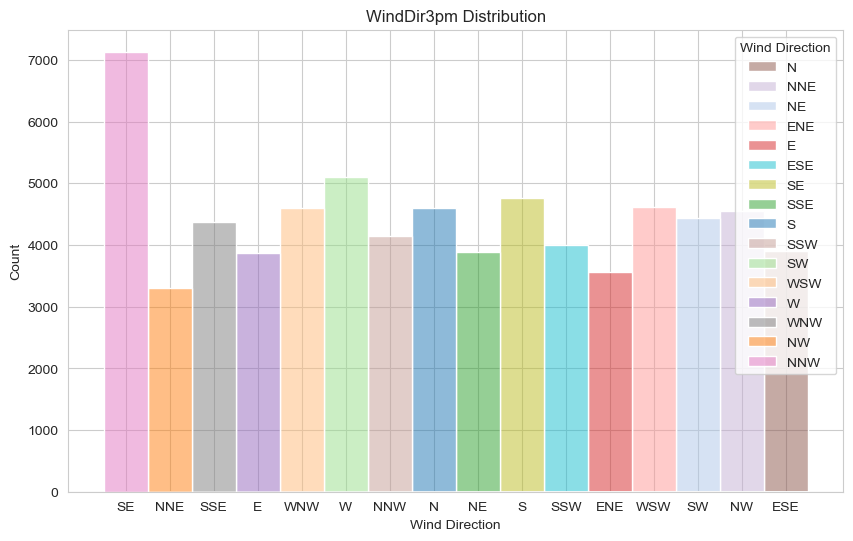

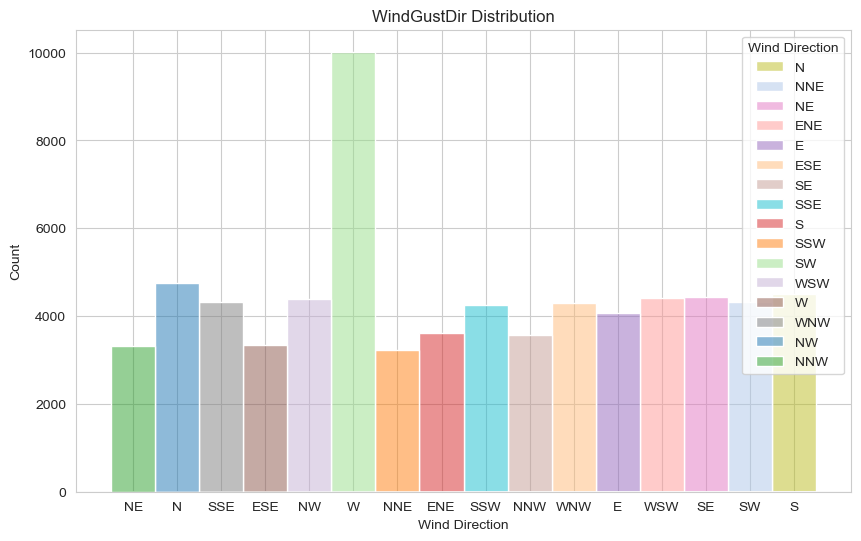

In [45]:
color_palette = {'N': '#1f77b4', 'NNE': '#ff7f0e', 'NE': '#2ca02c', 'ENE': '#d62728',
                 'E': '#9467bd', 'ESE': '#8c564b', 'SE': '#e377c2', 'SSE': '#7f7f7f',
                 'S': '#bcbd22', 'SSW': '#17becf', 'SW': '#aec7e8', 'WSW': '#ff9896',
                 'W': '#98df8a', 'WNW': '#ffbb78', 'NW': '#c5b0d5', 'NNW': '#c49c94'}

plt.figure(figsize=(12, 8))

for wind_dir in ['WindDir9am', 'WindDir3pm', 'WindGustDir']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_balanced, x=wind_dir, hue=wind_dir, palette=color_palette)
    plt.title(f'{wind_dir} Distribution')
    plt.xlabel('Wind Direction')
    plt.ylabel('Count')
    
    legend_labels = [key for key in color_palette if key in df_balanced[wind_dir].unique()]
    plt.legend(title='Wind Direction', labels=legend_labels)
    
    plt.xticks(rotation=0)
    plt.show()

The count plot shows wind direction distributions at 9 am and 3 pm, highlighting prevailing directions. At 9 am, most wind is northward; at 3 pm, it's southeast and west. Strongest gusts come from west, north, and southeast directions. This highlights wind pattern variations in direction and intensity across these times.

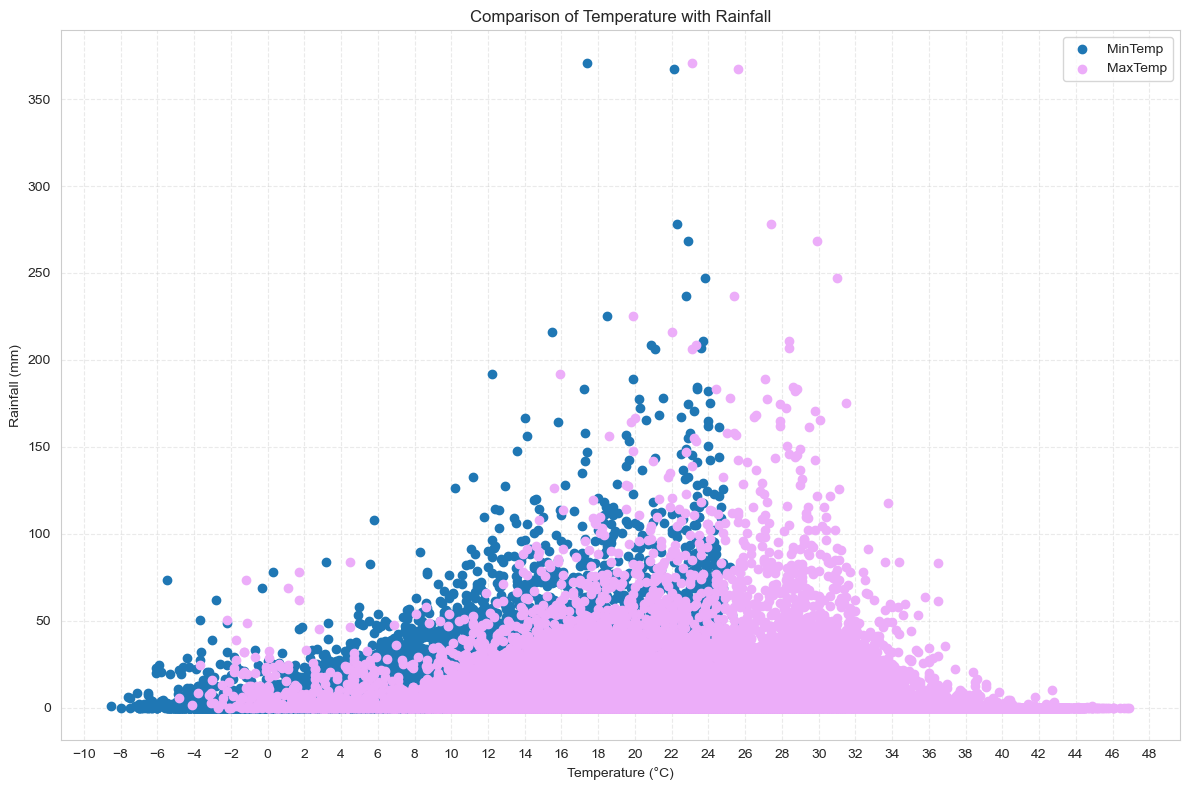

In [46]:
plt.figure(figsize=(12, 8))

# Scatter plot for MinTemp vs Rainfall
plt.scatter(df_balanced['MinTemp'], df_balanced['Rainfall'], color="#1f77b4", label='MinTemp')

# Scatter plot for MaxTemp vs Rainfall
plt.scatter(df_balanced['MaxTemp'], df_balanced['Rainfall'], color="#ECADF9", label='MaxTemp')

plt.title('Comparison of Temperature with Rainfall')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.xticks(range(-10, 50, 2), rotation=0)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.4) 
plt.tight_layout()
plt.show()

The scatter plot shows rainfall distribution across temperatures, highlighting a range of 10 to 32 degrees Celsius for most rainfall occurrences. Extremes like temperatures above 38°C or below 9°C align with minimal rainfall. This relationship indicates moderate temperatures favor more rainfall, while extremes lead to less.

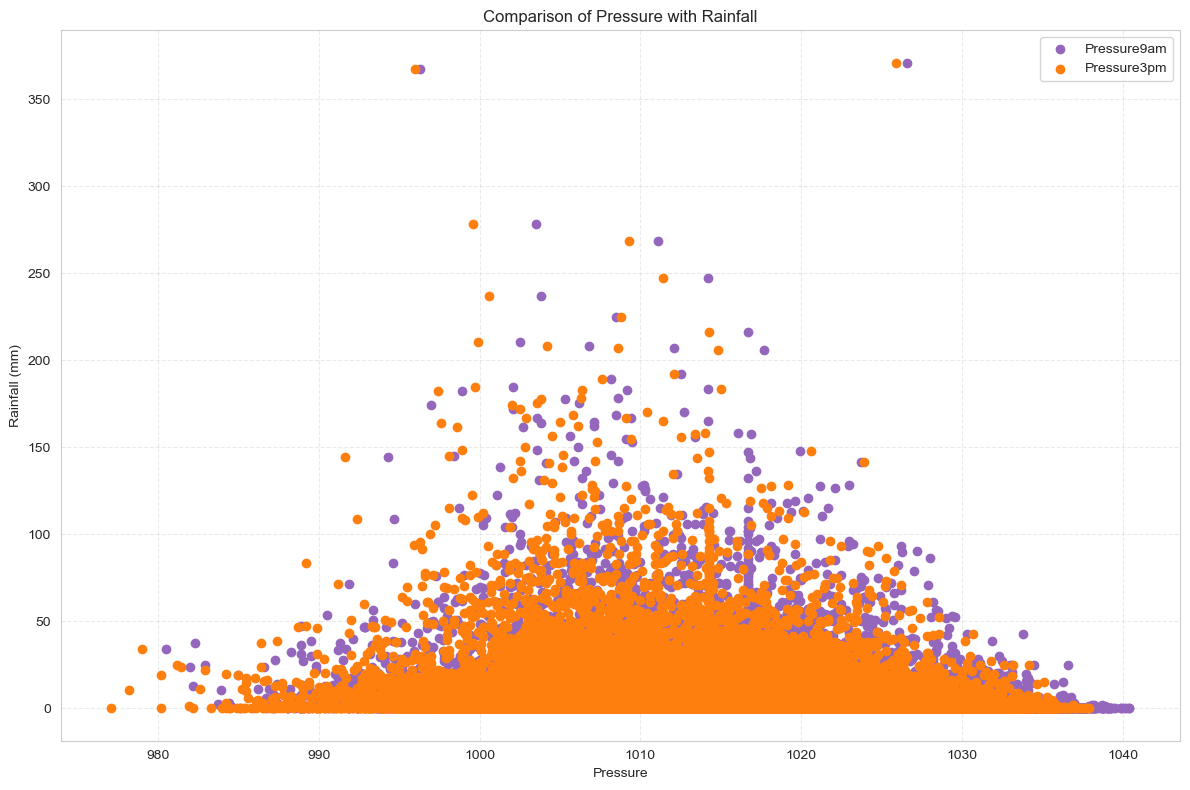

In [47]:
# Pressure at 9 am and 3 pm
plt.figure(figsize=(12, 8))

# Scatter plot for Pressure9am vs Rainfall
plt.scatter(df_balanced['Pressure9am'], df_balanced['Rainfall'], color="#9467bd")
# Scatter plot for Pressure3pm vs Rainfall
plt.scatter(df_balanced['Pressure3pm'], df_balanced['Rainfall'], color="#ff7f0e")

plt.title("Comparison of Pressure with Rainfall")
plt.xlabel('Pressure')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=0)
plt.legend(['Pressure9am', 'Pressure3pm'], loc='best')
plt.grid(True, linestyle='--', alpha=0.4) 
plt.tight_layout()
plt.show()

We can get insights through this scatterplot about the relationship between pressure and rainfall. Like temperature here also moderate pressure is in favor of rain and extremes lead to no rain.

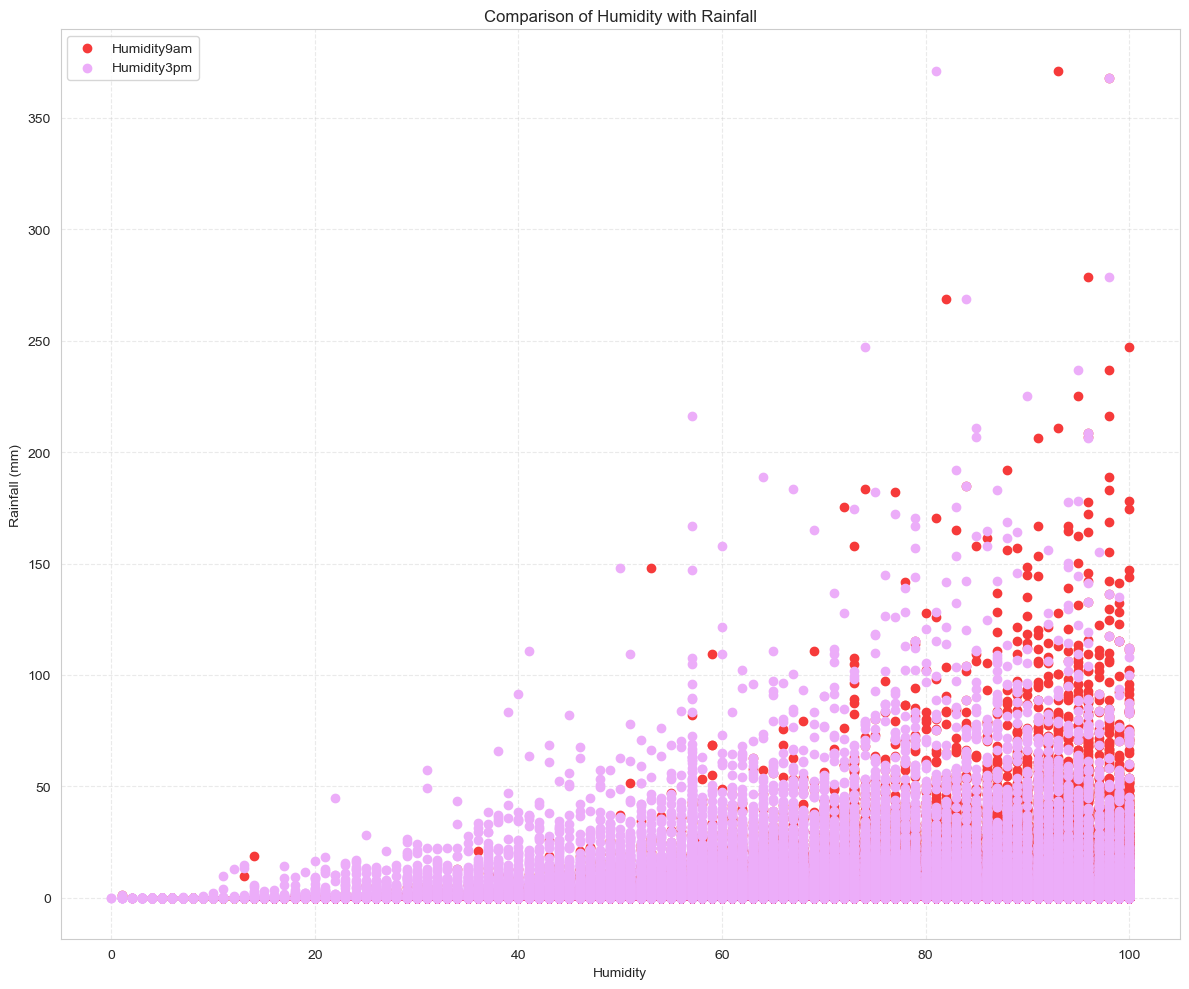

In [48]:
plt.figure(figsize=(12, 10))

# Scatter plot for Humidity9am vs Rainfall
plt.scatter(df_balanced['Humidity9am'], df_balanced['Rainfall'], color="#F63A3A")
# Scatter plot for Humidity3pm vs Rainfall
plt.scatter(df_balanced['Humidity3pm'], df_balanced['Rainfall'], color="#ECADF9")

plt.title("Comparison of Humidity with Rainfall")
plt.xlabel('Humidity')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=0)
plt.legend(['Humidity9am', 'Humidity3pm'], loc='best')
plt.grid(True, linestyle='--', alpha=0.4) 
plt.tight_layout()

plt.show()

We can see that higher humidity leads to more rainfall.

## Distributions of Categorical Features

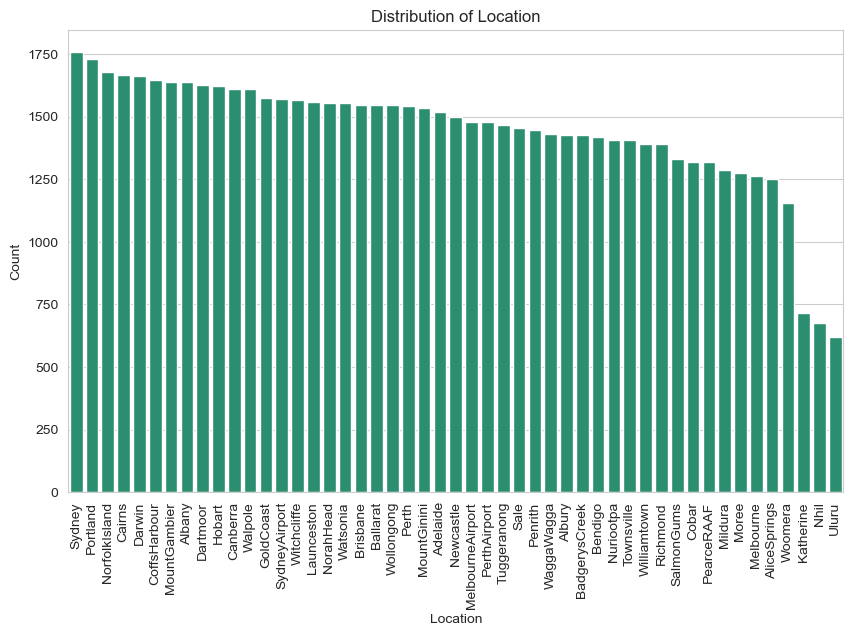

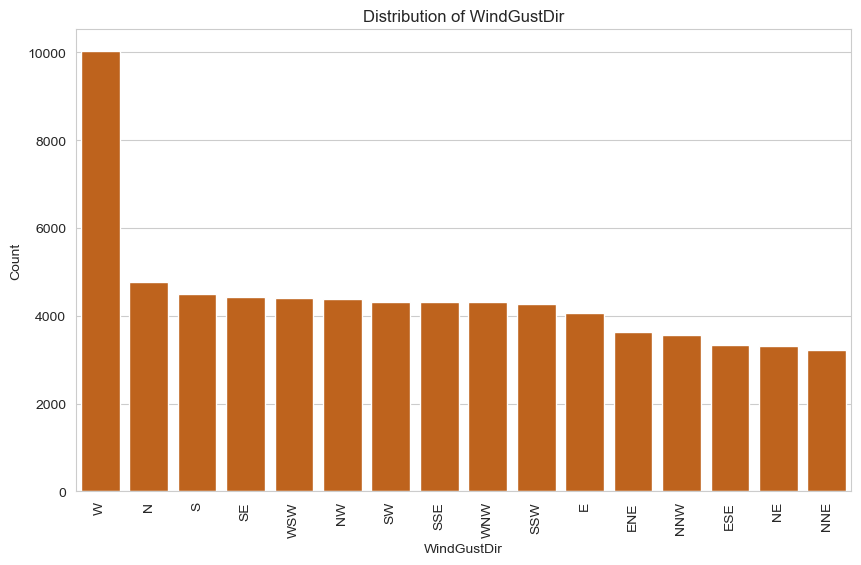

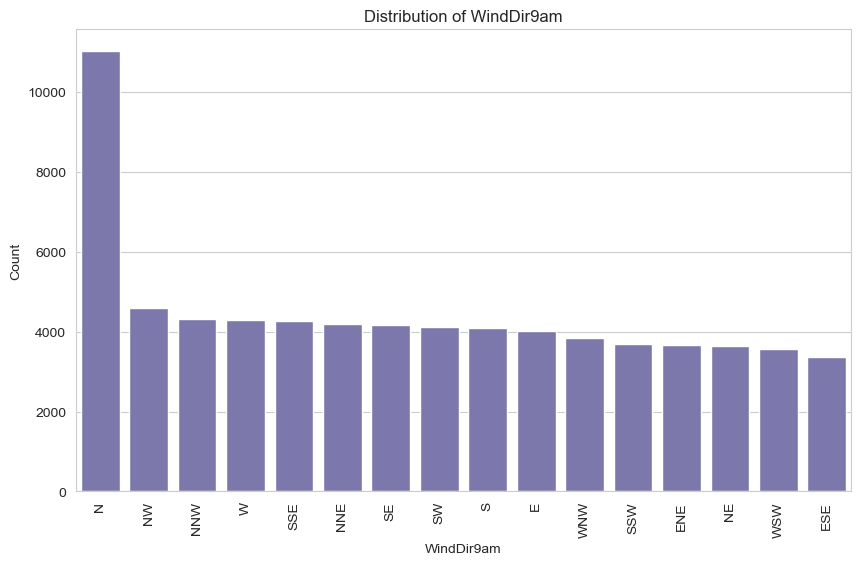

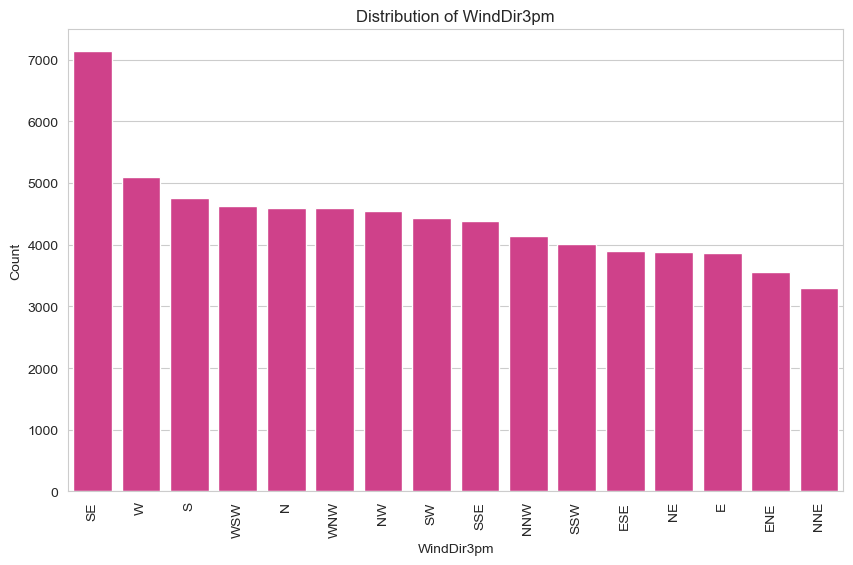

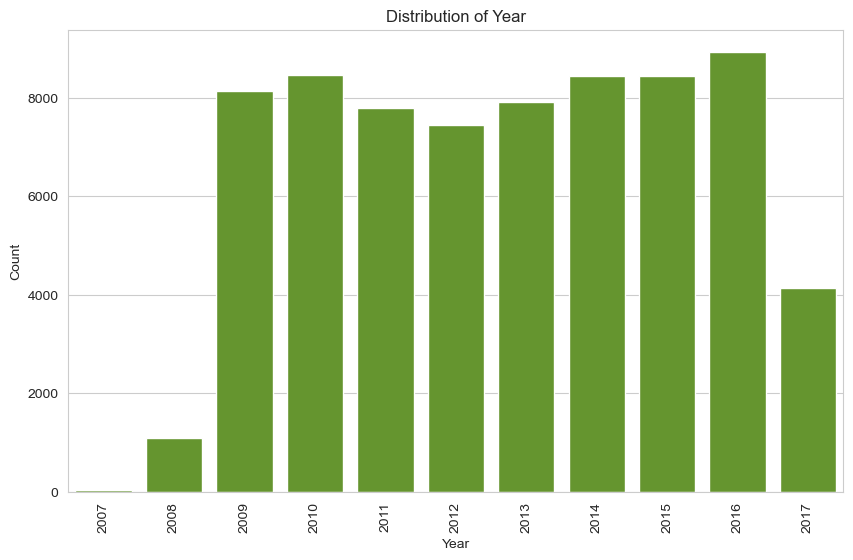

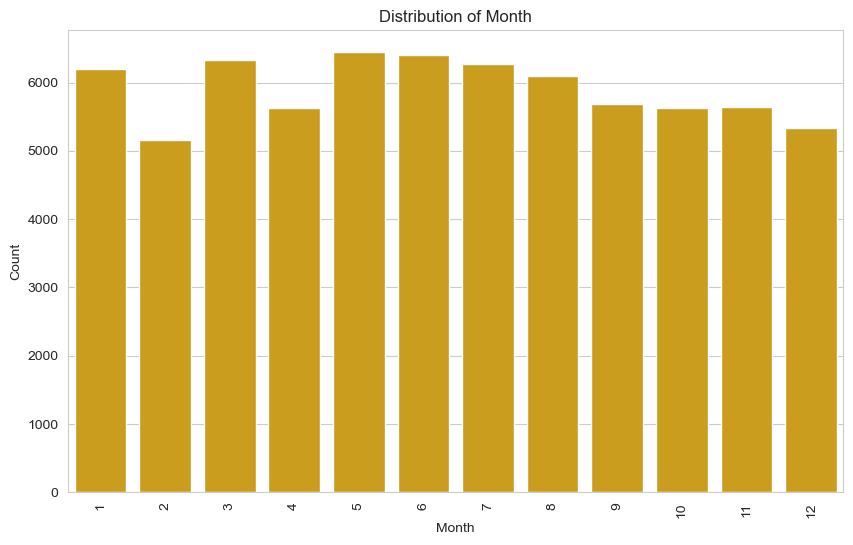

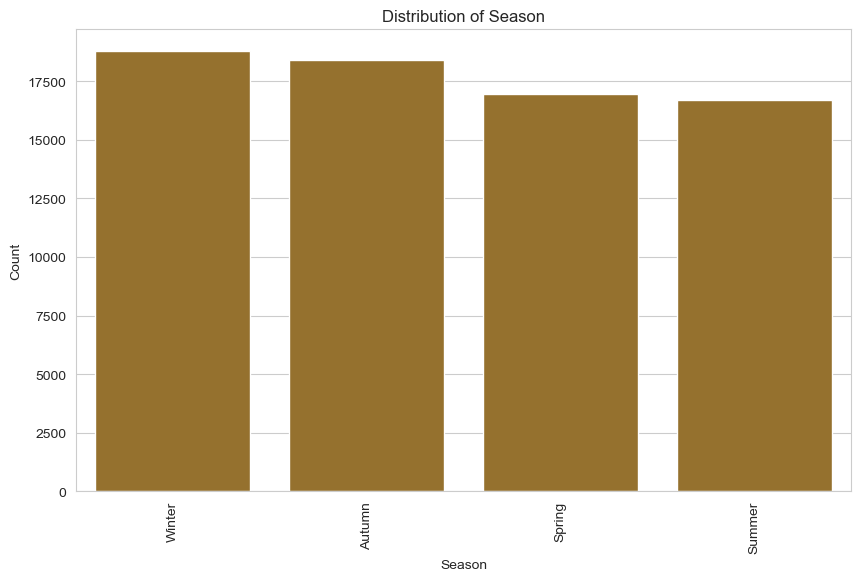

In [49]:
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Year', 'Month', 'Season']

custom_colors = sns.color_palette("Dark2", len(categorical_cols))

# Loop through each categorical column
for idx, col in enumerate(categorical_cols):
    category_counts = df_balanced[col].value_counts()
    
    plt.figure(figsize=(10, 6))
    
    sns.barplot(x=category_counts.index, y=category_counts, palette=[custom_colors[idx]])
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

## Distributions of Numerical Features

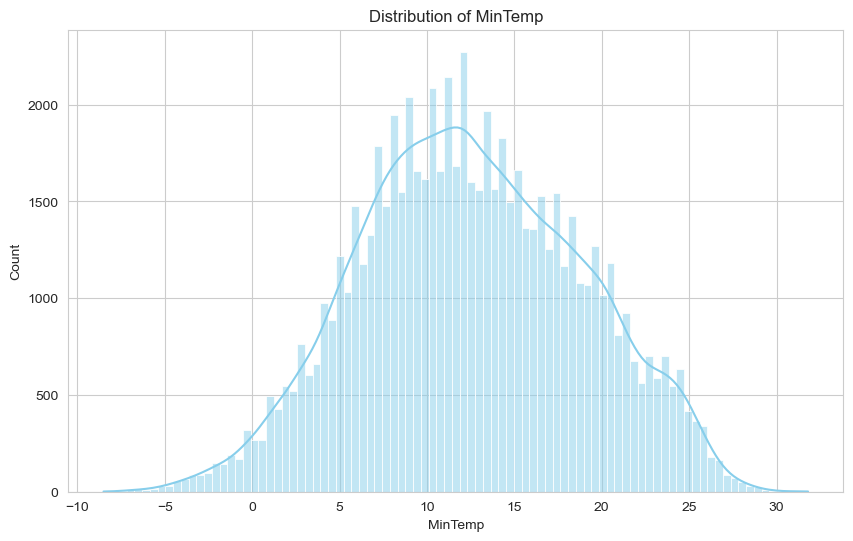

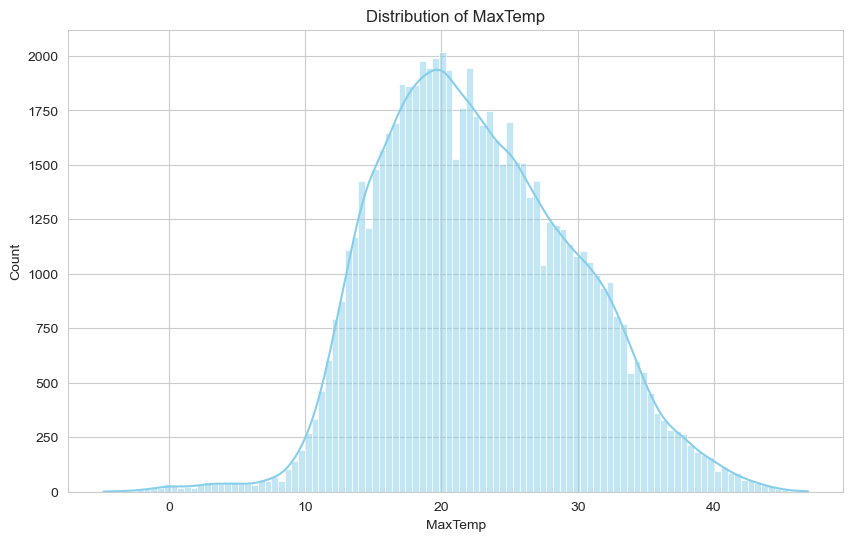

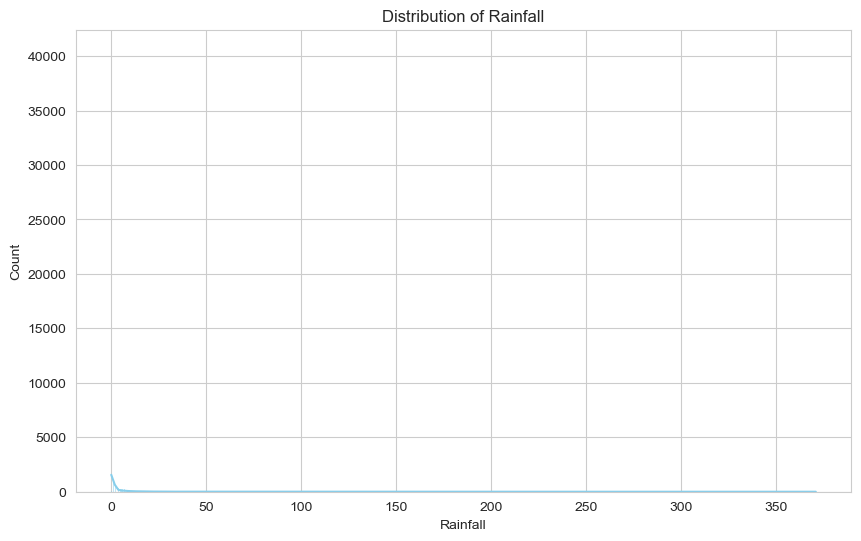

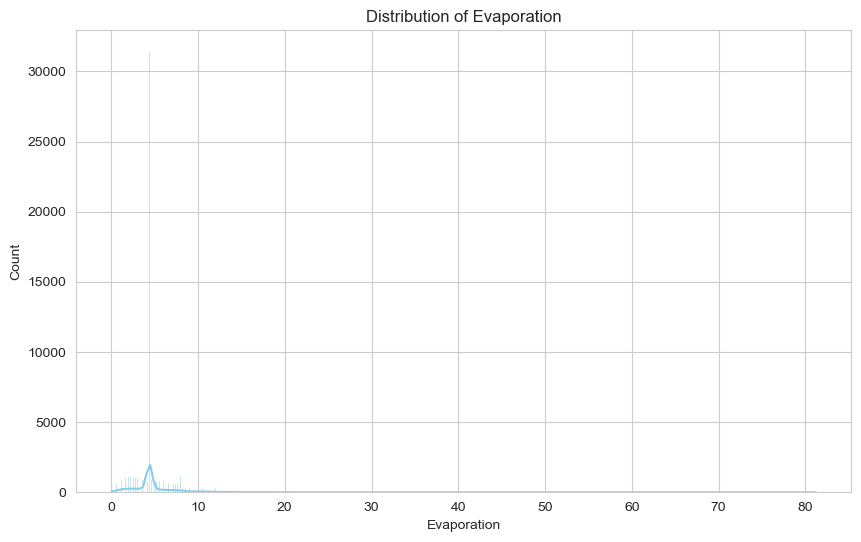

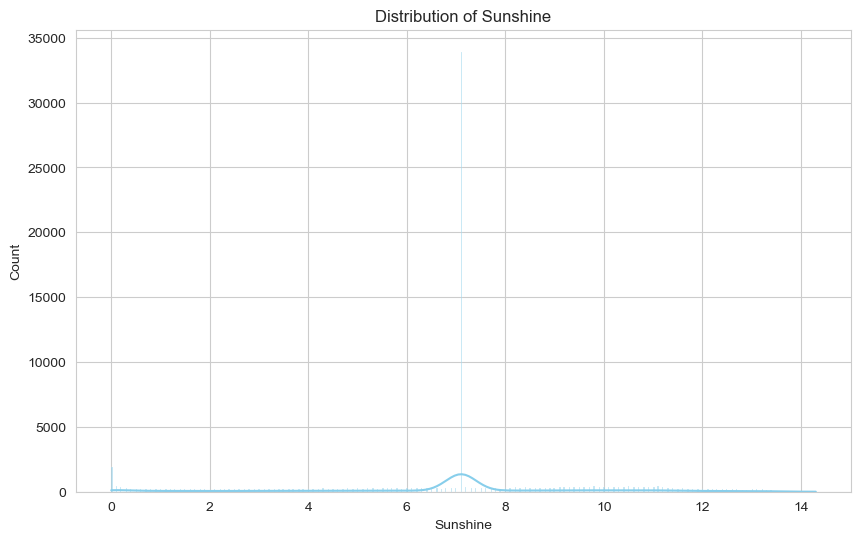

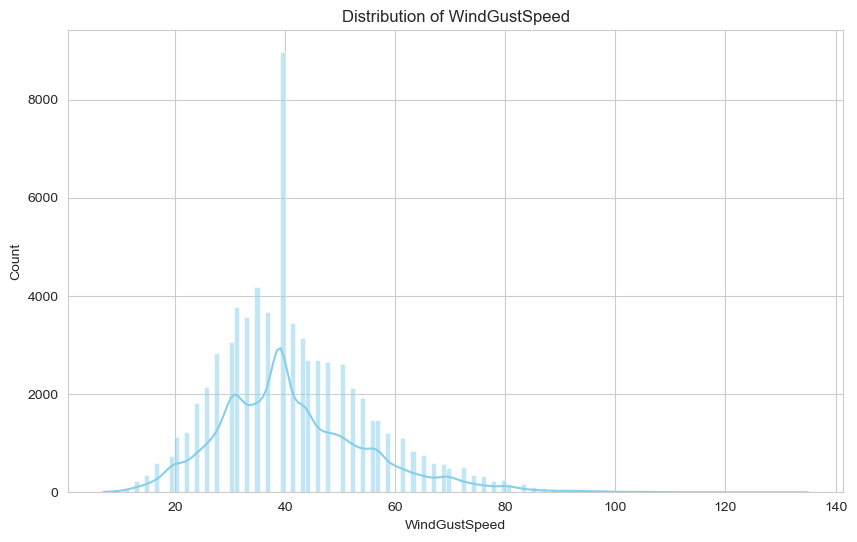

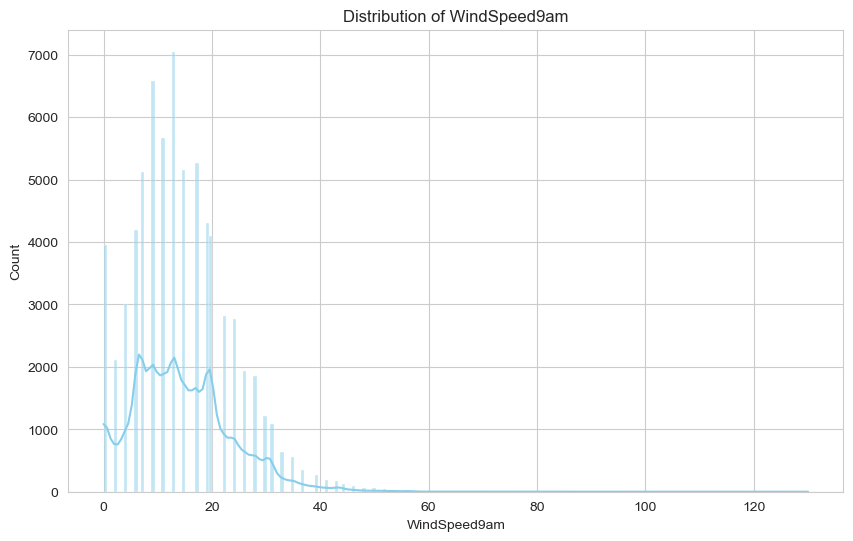

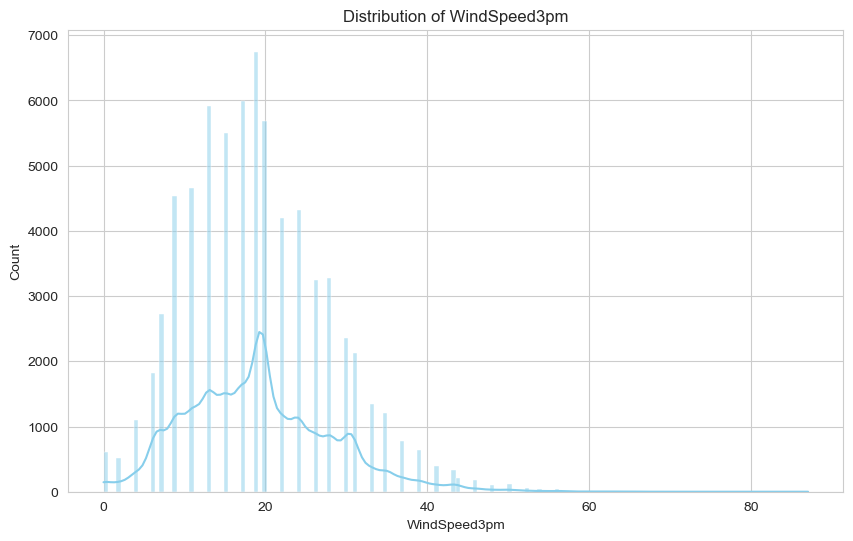

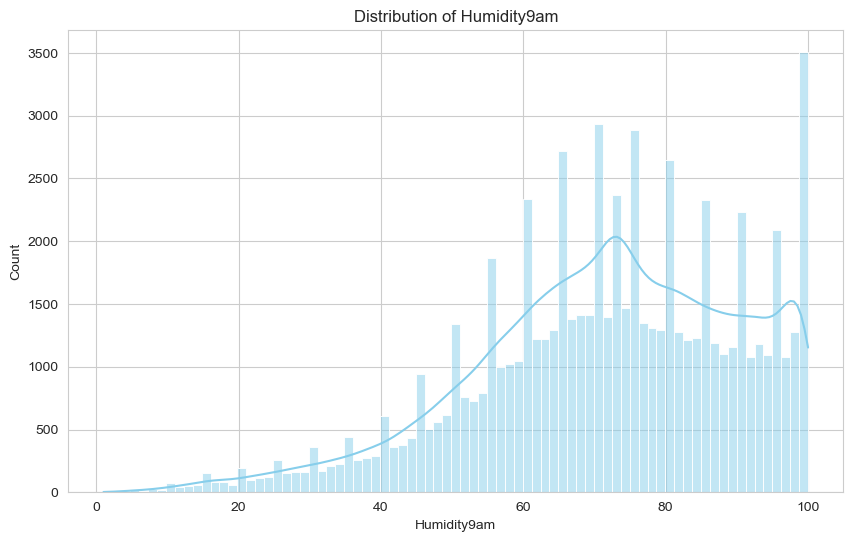

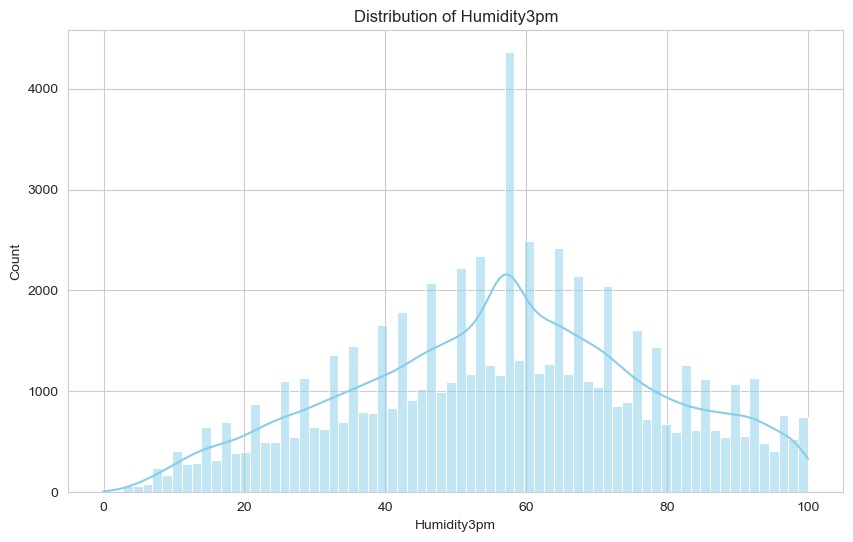

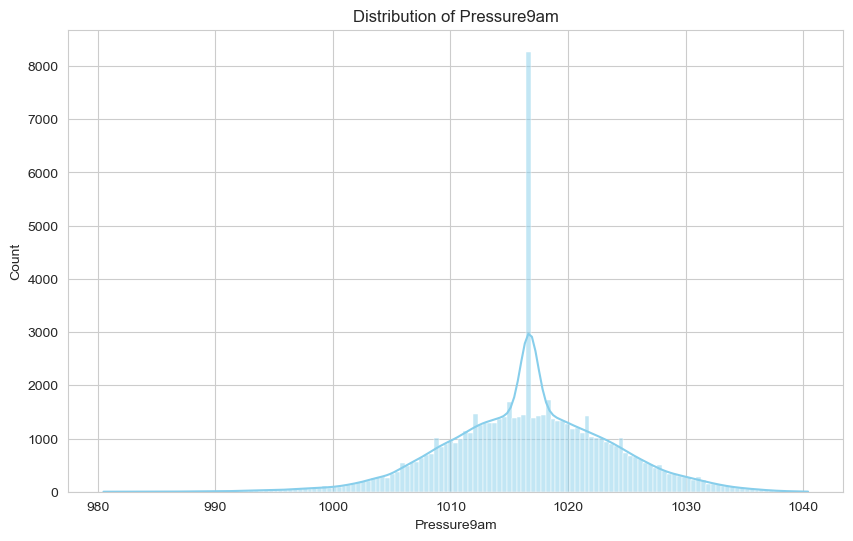

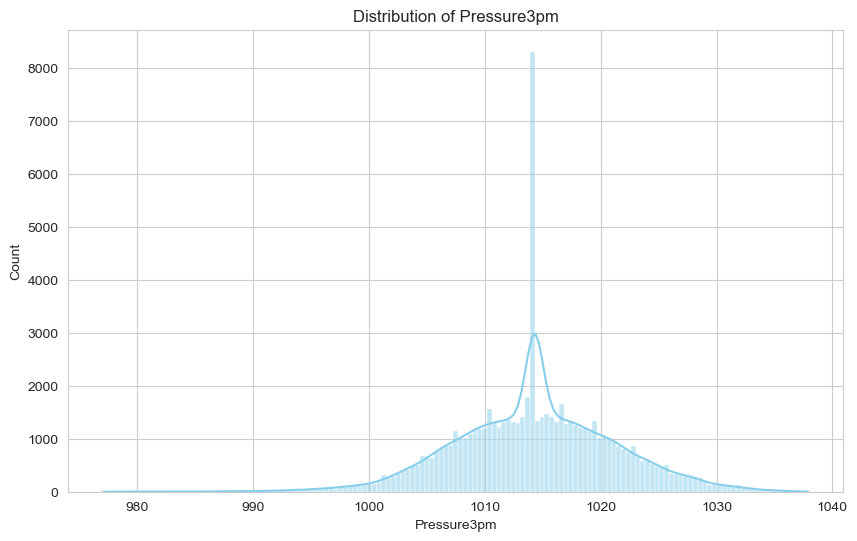

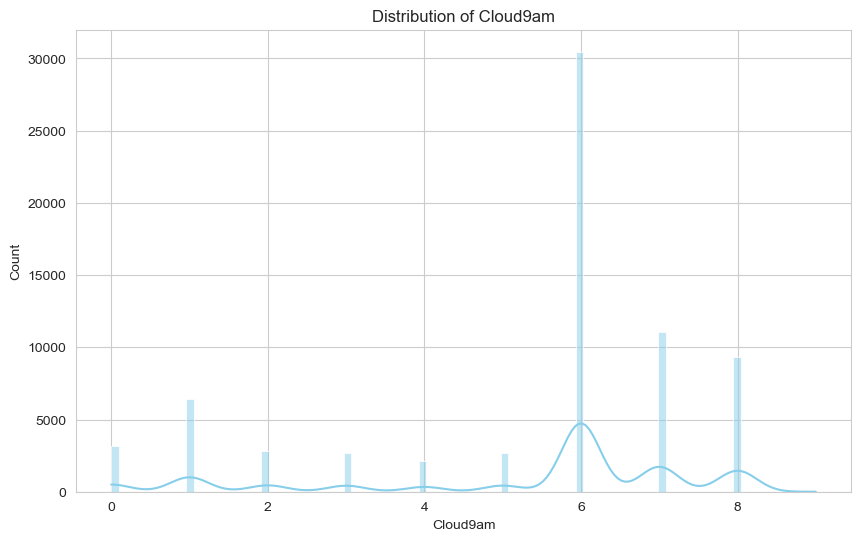

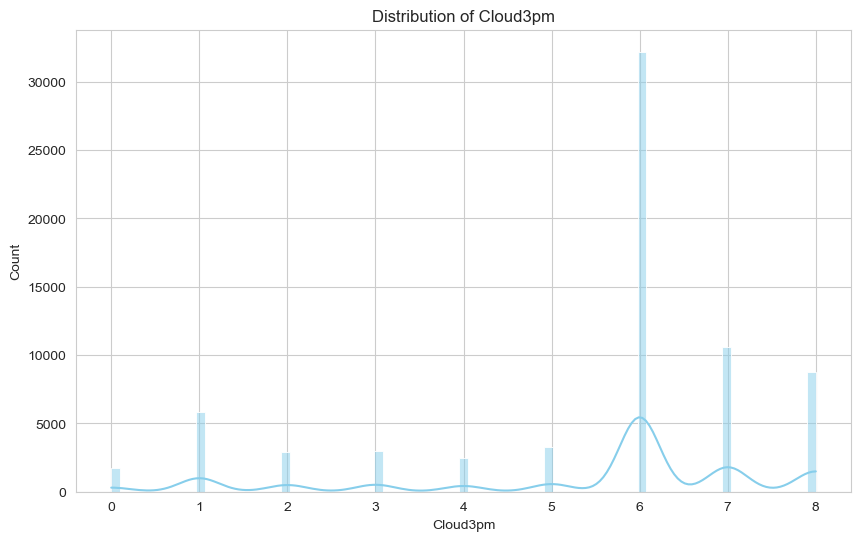

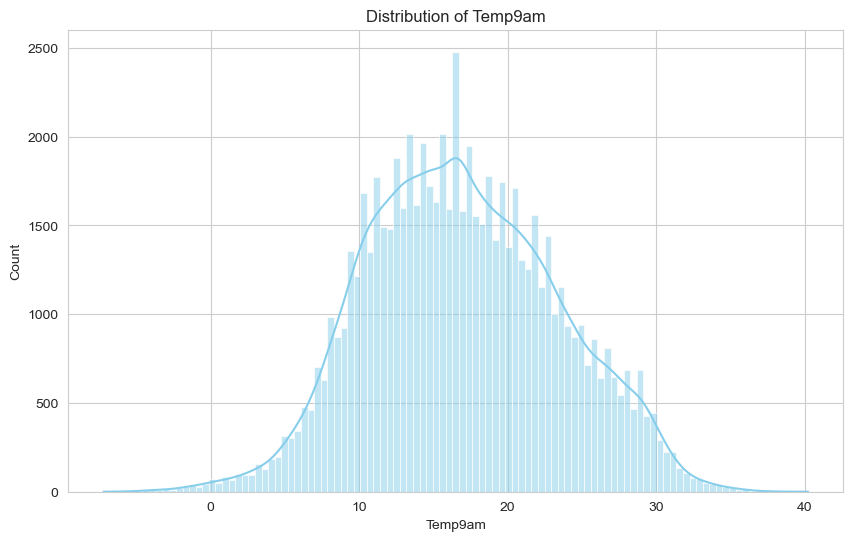

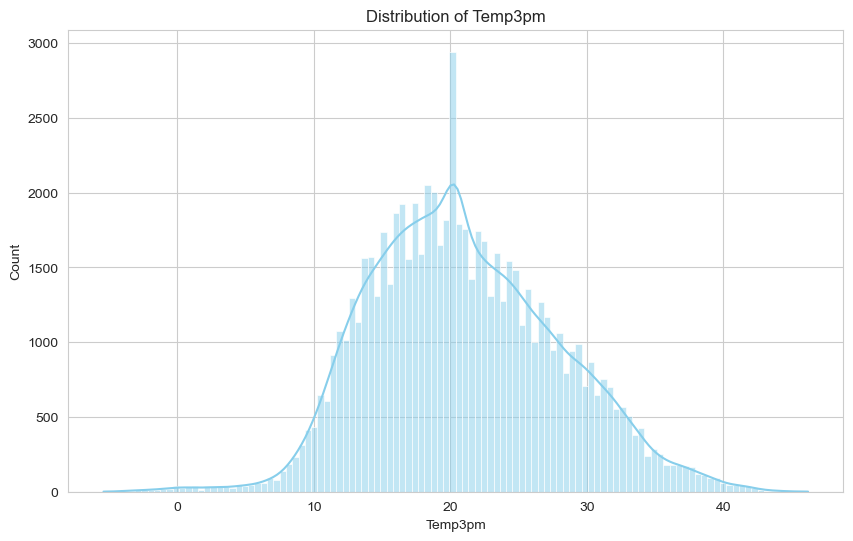

In [50]:
# Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df_balanced[col], kde=True, color='skyblue')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.show()

## Feature Extraction

In [38]:
# Separate features and target variable
X = df_cleaned.drop(['RainTomorrow'], axis=1)  # Features
y = df_cleaned['RainTomorrow']  # Target variable

# Apply SelectKBest for feature selection
k_best_features = 15
selector = SelectKBest(score_func=f_classif, k=k_best_features)

# Fit selector to training data
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get selected feature names (both numerical and categorical)
selected_features = X.columns[selected_feature_indices]

# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday'],
      dtype='object')


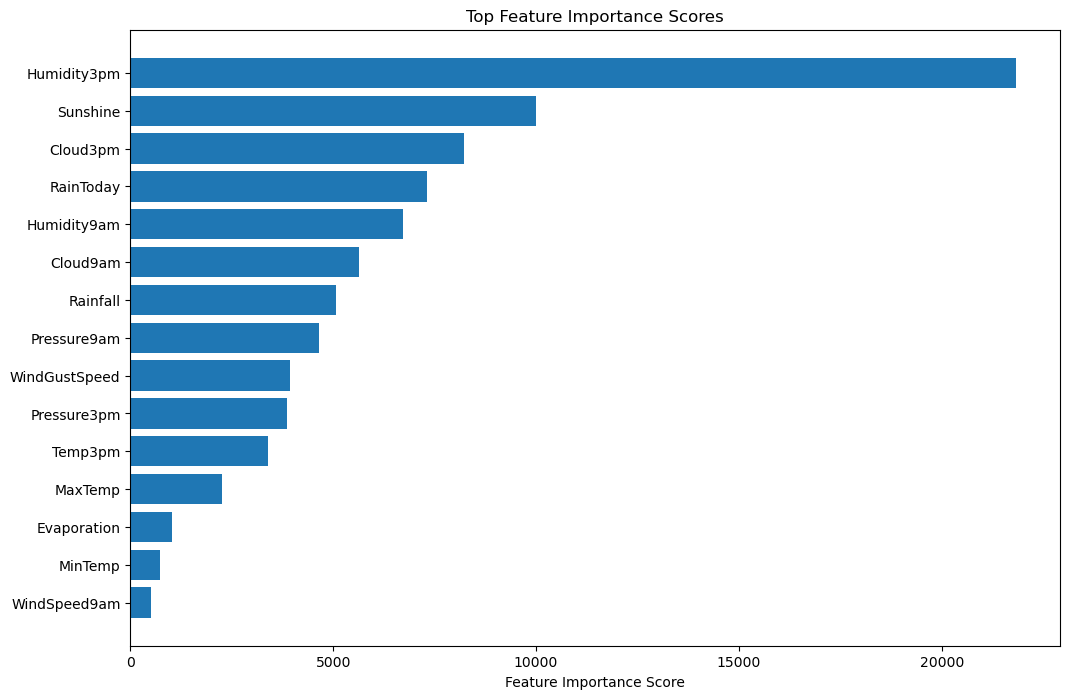

In [39]:
# Get feature importance scores from SelectKBest
feature_scores = selector.scores_

# Get feature names
feature_names = X.columns

# Combine feature names and scores into a DataFrame for easier sorting and plotting
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})

# Sort features by importance score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(feature_scores_df['Feature'][:k_best_features], feature_scores_df['Score'][:k_best_features])
plt.xlabel('Feature Importance Score')
plt.title('Top Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

# Model Training

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(53029, 15)

In [42]:
y_train.shape

(53029,)

In [43]:
X_test.shape

(13258, 15)

In [44]:
y_test.shape

(13258,)

### MLP (Multi-layer Perceptron)

Accuracy: 0.7910
Precision: 0.7957
Recall: 0.7121
F1 Score: 0.7516
ROC-AUC Score: 0.8714
Cohen's Kappa: 0.5722
Confusion Matrix:
[[6295 1076]
 [1695 4192]]


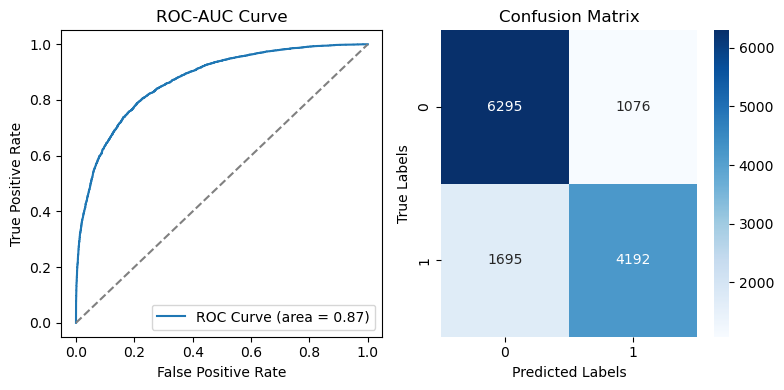

In [73]:
# Initialize and train MLP model
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = mlp_model.predict(X_test)
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)
mlp_roc_auc = roc_auc_score(y_test, y_pred_proba)
mlp_kappa = cohen_kappa_score(y_test, y_pred)
mlp_conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")
print(f"ROC-AUC Score: {mlp_roc_auc:.4f}")
print(f"Cohen's Kappa: {mlp_kappa:.4f}")
print("Confusion Matrix:")
print(mlp_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
axes[0].plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(mlp_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(mlp_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Logistic Regression

Accuracy: 0.7800
Precision: 0.7720
Recall: 0.7160
F1 Score: 0.7429
ROC-AUC Score: 0.8588
Cohen's Kappa: 0.5511
Confusion Matrix:
[[6126 1245]
 [1672 4215]]


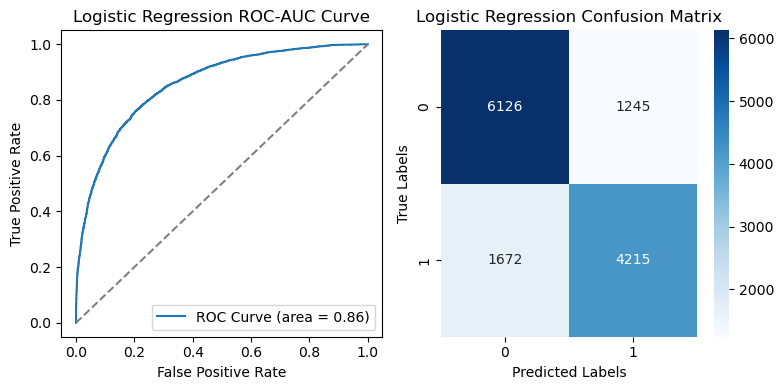

In [74]:
# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=2000)
logreg_model.fit(X_train, y_train)

# Make predictions on test data
logreg_y_pred = logreg_model.predict(X_test)
logreg_y_pred_proba = logreg_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)
logreg_roc_auc = roc_auc_score(y_test, logreg_y_pred_proba)
logreg_kappa = cohen_kappa_score(y_test, logreg_y_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_y_pred)

# Print evaluation metrics
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"F1 Score: {logreg_f1:.4f}")
print(f"ROC-AUC Score: {logreg_roc_auc:.4f}")
print(f"Cohen's Kappa: {logreg_kappa:.4f}")
print("Confusion Matrix:")
print(logreg_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Logistic Regression
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC-AUC curve
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg_y_pred_proba, pos_label=1)
axes[0].plot(logreg_fpr, logreg_tpr, label='ROC Curve (area = {:.2f})'.format(logreg_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Logistic Regression ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(logreg_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

### Decision Trees

Accuracy: 0.7156
Precision: 0.6772
Recall: 0.6873
F1 Score: 0.6822
ROC-AUC Score: 0.7127
Cohen's Kappa: 0.4249
Confusion Matrix:
[[5442 1929]
 [1841 4046]]


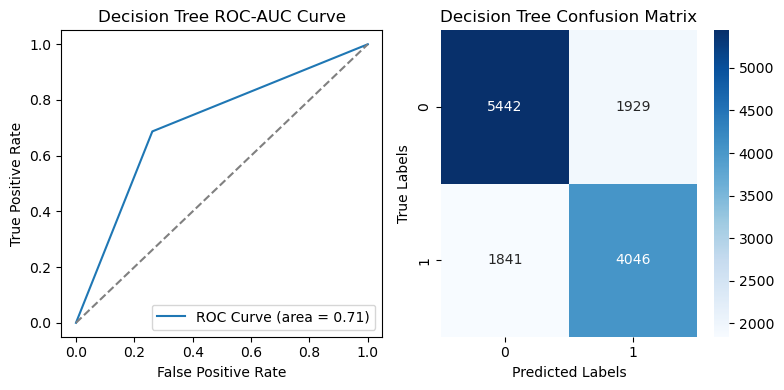

In [75]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on test data
dt_y_pred = dt_model.predict(X_test)
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_roc_auc = roc_auc_score(y_test, dt_y_pred_proba)
dt_kappa = cohen_kappa_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Print evaluation metrics
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print(f"ROC-AUC Score: {dt_roc_auc:.4f}")
print(f"Cohen's Kappa: {dt_kappa:.4f}")
print("Confusion Matrix:")
print(dt_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Decision Tree
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC-AUC curve
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_pred_proba, pos_label=1)
axes[0].plot(dt_fpr, dt_tpr, label='ROC Curve (area = {:.2f})'.format(dt_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Decision Tree ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(dt_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()

### Random Forest

Accuracy: 0.7960
Precision: 0.7866
Recall: 0.7418
F1 Score: 0.7635
ROC-AUC Score: 0.8752
Cohen's Kappa: 0.5844
Forest Confusion Matrix:
[[6186 1185]
 [1520 4367]]


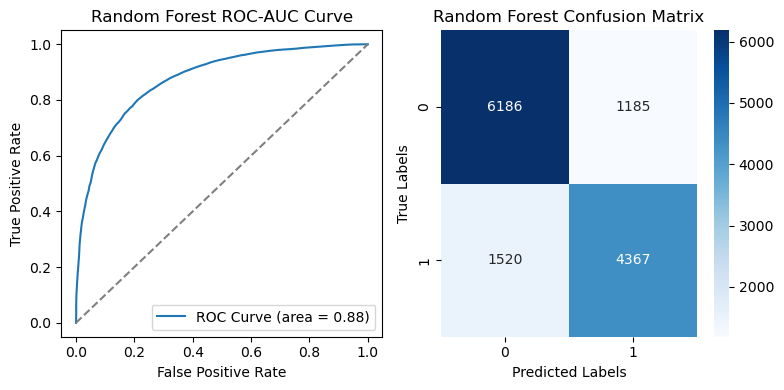

In [45]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test data
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
rf_kappa = cohen_kappa_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Print evaluation metrics
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC-AUC Score: {rf_roc_auc:.4f}")
print(f"Cohen's Kappa: {rf_kappa:.4f}")
print("Forest Confusion Matrix:")
print(rf_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Random Forest
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC-AUC curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred_proba, pos_label=1)
axes[0].plot(rf_fpr, rf_tpr, label='ROC Curve (area = {:.2f})'.format(rf_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Random Forest ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

### Gradient Boosting Machines (GBM)

Accuracy: 0.7885
Precision: 0.7807
Recall: 0.7282
F1 Score: 0.7536
ROC-AUC Score: 0.8665
Cohen's Kappa: 0.5687
Confusion Matrix:
[[6167 1204]
 [1600 4287]]


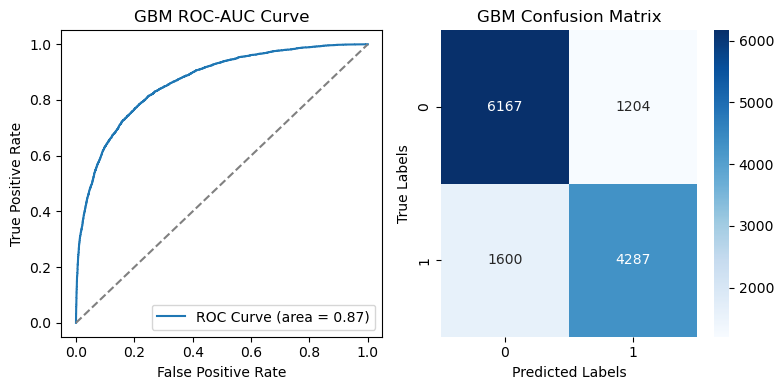

In [77]:
# Initialize and train GBM model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions on test data
gbm_y_pred = gbm_model.predict(X_test)
gbm_y_pred_proba = gbm_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
gbm_accuracy = accuracy_score(y_test, gbm_y_pred)
gbm_precision = precision_score(y_test, gbm_y_pred)
gbm_recall = recall_score(y_test, gbm_y_pred)
gbm_f1 = f1_score(y_test, gbm_y_pred)
gbm_roc_auc = roc_auc_score(y_test, gbm_y_pred_proba)
gbm_kappa = cohen_kappa_score(y_test, gbm_y_pred)
gbm_conf_matrix = confusion_matrix(y_test, gbm_y_pred)

# Print evaluation metrics
print(f"Accuracy: {gbm_accuracy:.4f}")
print(f"Precision: {gbm_precision:.4f}")
print(f"Recall: {gbm_recall:.4f}")
print(f"F1 Score: {gbm_f1:.4f}")
print(f"ROC-AUC Score: {gbm_roc_auc:.4f}")
print(f"Cohen's Kappa: {gbm_kappa:.4f}")
print("Confusion Matrix:")
print(gbm_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for GBM
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC-AUC curve
gbm_fpr, gbm_tpr, gbm_thresholds = roc_curve(y_test, gbm_y_pred_proba, pos_label=1)
axes[0].plot(gbm_fpr, gbm_tpr, label='ROC Curve (area = {:.2f})'.format(gbm_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('GBM ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(gbm_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('GBM Confusion Matrix')

plt.tight_layout()
plt.show()

### AdaBoost Classifier

Accuracy: 0.7769
Precision: 0.7694
Recall: 0.7105
F1 Score: 0.7388
ROC-AUC Score: 0.8569
Cohen's Kappa: 0.5446
Confusion Matrix:
[[6117 1254]
 [1704 4183]]


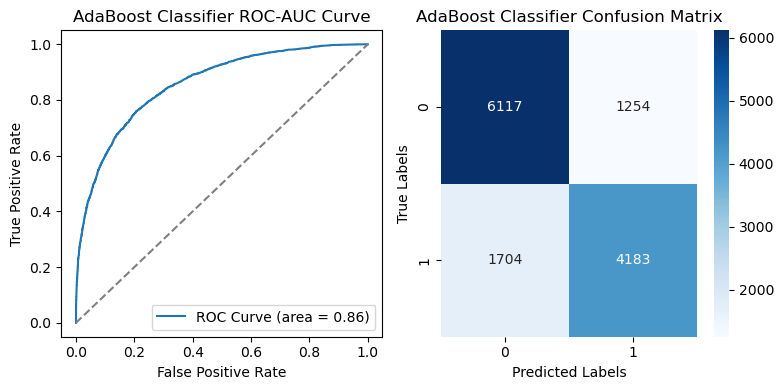

In [78]:
# Initialize and train AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on test data
adaboost_y_pred = adaboost_model.predict(X_test)
adaboost_y_pred_proba = adaboost_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
adaboost_precision = precision_score(y_test, adaboost_y_pred)
adaboost_recall = recall_score(y_test, adaboost_y_pred)
adaboost_f1 = f1_score(y_test, adaboost_y_pred)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_y_pred_proba)
adaboost_kappa = cohen_kappa_score(y_test, adaboost_y_pred)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_y_pred)

# Print evaluation metrics
print(f"Accuracy: {adaboost_accuracy:.4f}")
print(f"Precision: {adaboost_precision:.4f}")
print(f"Recall: {adaboost_recall:.4f}")
print(f"F1 Score: {adaboost_f1:.4f}")
print(f"ROC-AUC Score: {adaboost_roc_auc:.4f}")
print(f"Cohen's Kappa: {adaboost_kappa:.4f}")
print("Confusion Matrix:")
print(adaboost_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for AdaBoost Classifier
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC-AUC curve
adaboost_fpr, adaboost_tpr, adaboost_thresholds = roc_curve(y_test, adaboost_y_pred_proba, pos_label=1)
axes[0].plot(adaboost_fpr, adaboost_tpr, label='ROC Curve (area = {:.2f})'.format(adaboost_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('AdaBoost Classifier ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(adaboost_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('AdaBoost Classifier Confusion Matrix')

plt.tight_layout()
plt.show()

### Gaussian Naive Bayes (GaussianNB)

Accuracy: 0.7513
Precision: 0.7263
Recall: 0.7060
F1 Score: 0.7160
Cohen's Kappa: 0.4949
Confusion Matrix:
[[5805 1566]
 [1731 4156]]


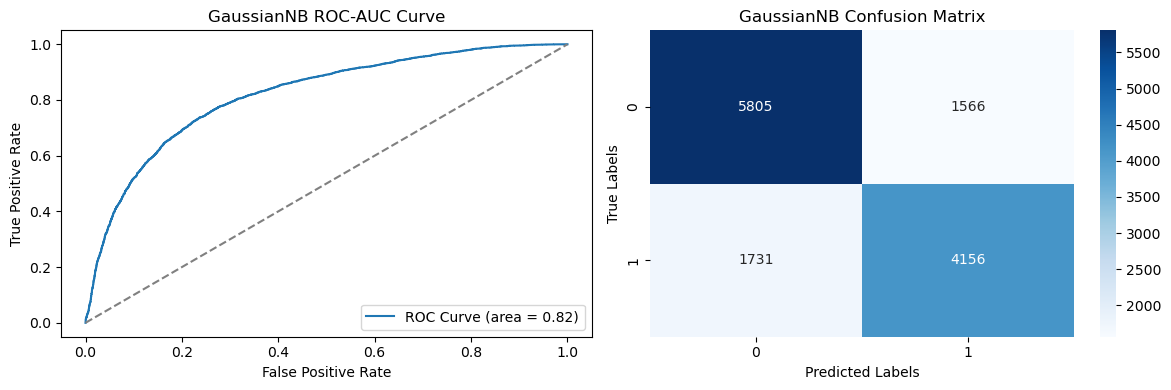

In [79]:
# Initialize and train GaussianNB model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on test data
gnb_y_pred = gnb_model.predict(X_test)
gnb_y_pred_proba = gnb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
gnb_precision = precision_score(y_test, gnb_y_pred)
gnb_recall = recall_score(y_test, gnb_y_pred)
gnb_f1 = f1_score(y_test, gnb_y_pred)
gnb_kappa = cohen_kappa_score(y_test, gnb_y_pred)
gnb_conf_matrix = confusion_matrix(y_test, gnb_y_pred)

# Calculate ROC-AUC score
gnb_roc_auc = roc_auc_score(y_test, gnb_y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {gnb_accuracy:.4f}")
print(f"Precision: {gnb_precision:.4f}")
print(f"Recall: {gnb_recall:.4f}")
print(f"F1 Score: {gnb_f1:.4f}")
print(f"Cohen's Kappa: {gnb_kappa:.4f}")
print("Confusion Matrix:")
print(gnb_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for GaussianNB
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ROC-AUC curve
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_y_pred_proba, pos_label=1)
axes[0].plot(gnb_fpr, gnb_tpr, label='ROC Curve (area = {:.2f})'.format(gnb_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('GaussianNB ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(gnb_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('GaussianNB Confusion Matrix')

plt.tight_layout()
plt.show()

### Extra Trees Classifier

Accuracy: 0.7936
Precision: 0.7833
Recall: 0.7399
F1 Score: 0.7610
Cohen's Kappa: 0.5797
Confusion Matrix:
[[6166 1205]
 [1531 4356]]


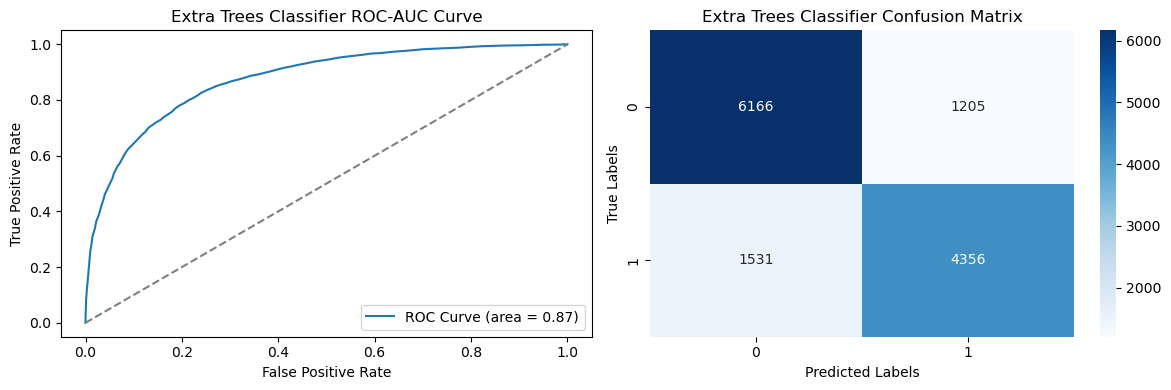

In [80]:
# Initialize and train Extra Trees model
extratrees_model = ExtraTreesClassifier(random_state=42)
extratrees_model.fit(X_train, y_train)

# Make predictions on test data
extratrees_y_pred = extratrees_model.predict(X_test)
extratrees_y_pred_proba = extratrees_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
extratrees_accuracy = accuracy_score(y_test, extratrees_y_pred)
extratrees_precision = precision_score(y_test, extratrees_y_pred)
extratrees_recall = recall_score(y_test, extratrees_y_pred)
extratrees_f1 = f1_score(y_test, extratrees_y_pred)
extratrees_kappa = cohen_kappa_score(y_test, extratrees_y_pred)
extratrees_conf_matrix = confusion_matrix(y_test, extratrees_y_pred)

# Calculate ROC-AUC score
extratrees_roc_auc = roc_auc_score(y_test, extratrees_y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {extratrees_accuracy:.4f}")
print(f"Precision: {extratrees_precision:.4f}")
print(f"Recall: {extratrees_recall:.4f}")
print(f"F1 Score: {extratrees_f1:.4f}")
print(f"Cohen's Kappa: {extratrees_kappa:.4f}")
print("Confusion Matrix:")
print(extratrees_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Extra Trees Classifier
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ROC-AUC curve
extratrees_fpr, extratrees_tpr, extratrees_thresholds = roc_curve(y_test, extratrees_y_pred_proba, pos_label=1)
axes[0].plot(extratrees_fpr, extratrees_tpr, label='ROC Curve (area = {:.2f})'.format(extratrees_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Extra Trees Classifier ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(extratrees_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Extra Trees Classifier Confusion Matrix')

plt.tight_layout()
plt.show()

### CatBoost Classifier

Accuracy: 0.7999
Precision: 0.7910
Recall: 0.7466
F1 Score: 0.7682
Cohen's Kappa: 0.5924
ROC-AUC Score: 0.8816
Confusion Matrix:
[[6210 1161]
 [1492 4395]]


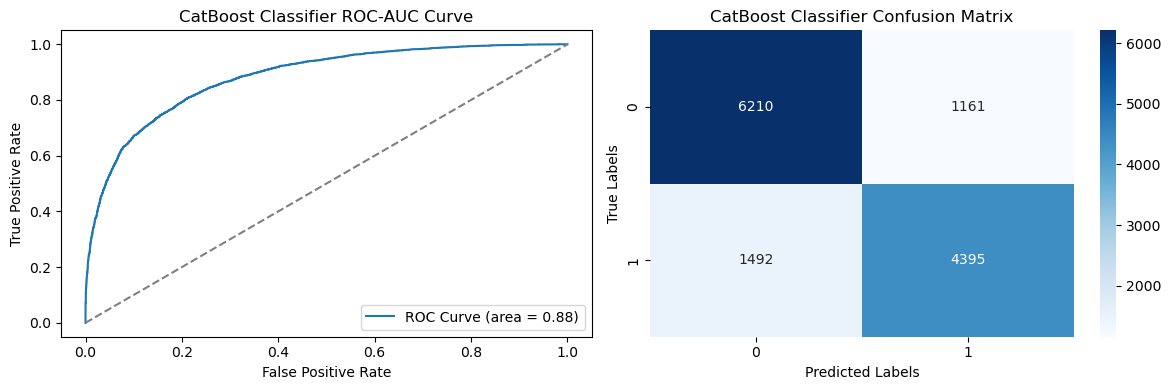

In [81]:
catboost_model = CatBoostClassifier(random_seed=42, verbose=0)  # Default parameters

# Train CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
y_pred = catboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for CatBoost Classifier
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
axes[0].plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('CatBoost Classifier ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('CatBoost Classifier Confusion Matrix')

plt.tight_layout()
plt.show()

### Summary

In [82]:
# Create a dictionary to store evaluation metrics
metrics_dict = {
    'Model': ['MLP Classifier', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'GaussianNB', 'Extra Trees', 'CatBoost'],
    'Accuracy': [mlp_accuracy, logreg_accuracy, dt_accuracy, rf_accuracy, gbm_accuracy, adaboost_accuracy, gnb_accuracy, extratrees_accuracy, accuracy],
    'Precision': [mlp_precision, logreg_precision, dt_precision, rf_precision, gbm_precision, adaboost_precision, gnb_precision, extratrees_precision, precision],
    'Recall': [mlp_recall, logreg_recall, dt_recall, rf_recall, gbm_recall, adaboost_recall, gnb_recall, extratrees_recall, recall],
    'F1 Score': [mlp_f1, logreg_f1, dt_f1, rf_f1, gbm_f1, adaboost_f1, gnb_f1, extratrees_f1, f1],
    'ROC-AUC': [mlp_roc_auc, logreg_roc_auc, dt_roc_auc, rf_roc_auc, gbm_roc_auc, adaboost_roc_auc, gnb_roc_auc, extratrees_roc_auc, roc_auc],
    "Cohen's Kappa": [mlp_kappa, logreg_kappa, dt_kappa, rf_kappa, gbm_kappa, adaboost_kappa, gnb_kappa, extratrees_kappa, kappa]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display formatted table
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid'))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╤═════════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   ROC-AUC │   Cohen's Kappa │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╪═════════════════╡
│  0 │ MLP Classifier      │   0.790994 │    0.795748 │ 0.712077 │   0.751591 │  0.871355 │        0.572156 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┼─────────────────┤
│  1 │ Logistic Regression │   0.779982 │    0.771978 │ 0.715984 │   0.742928 │  0.858766 │        0.551103 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┼─────────────────┤
│  2 │ Decision Tree       │   0.715643 │    0.677155 │ 0.687277 │   0.682178 │  0.712745 │        0.424936 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┼─────────────────┤
│  3 │ Ran

# Hyperparameter Tuning

#### MLP

Best Hyperparameters: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 0.0001}
Optimal Model Accuracy: 0.7910
Optimal Model Precision: 0.7957
Optimal Model Recall: 0.7121
Optimal Model F1 Score: 0.7516
Optimal Model ROC-AUC Score: 0.8714
Optimal Model Cohen's Kappa: 0.5722
Optimal Model Confusion Matrix:
[[6295 1076]
 [1695 4192]]


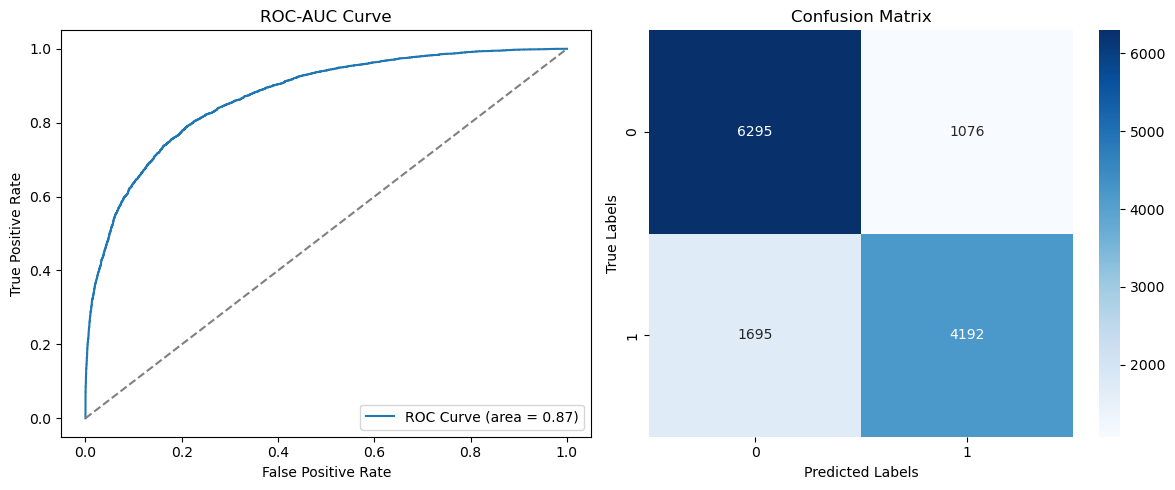

In [55]:
# Initialize MLP Classifier with increased max_iter
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=5, cv=3, random_state=42)

# Perform Randomized Search Cross Validation
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize MLP model with best parameters
optimal_mlp_model = MLPClassifier(random_state=42, **best_params)

# Train optimal MLP model
optimal_mlp_model.fit(X_train, y_train)

# Make predictions on test data
optimal_y_pred = optimal_mlp_model.predict(X_test)
optimal_y_pred_proba = optimal_mlp_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for optimal model
optimal_accuracy = accuracy_score(y_test, optimal_y_pred)
optimal_precision = precision_score(y_test, optimal_y_pred)
optimal_recall = recall_score(y_test, optimal_y_pred)
optimal_f1 = f1_score(y_test, optimal_y_pred)
optimal_roc_auc = roc_auc_score(y_test, optimal_y_pred_proba)
optimal_kappa = cohen_kappa_score(y_test, optimal_y_pred)
optimal_conf_matrix = confusion_matrix(y_test, optimal_y_pred)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_precision:.4f}")
print(f"Optimal Model Recall: {optimal_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_f1:.4f}")
print(f"Optimal Model ROC-AUC Score: {optimal_roc_auc:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_kappa:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_conf_matrix)


# Plot ROC-AUC curve and confusion matrix side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, optimal_y_pred_proba, pos_label=1)
axes[0].plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(optimal_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()

#### Logistic Regression

Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 2000, 'C': 1.0}
Optimal Model Accuracy: 0.7801
Optimal Model Precision: 0.7721
Optimal Model Recall: 0.7160
Optimal Model F1 Score: 0.7430
Optimal Model ROC-AUC Score: 0.8588
Optimal Model Cohen's Kappa: 0.5512
Optimal Model Confusion Matrix:
[[6127 1244]
 [1672 4215]]


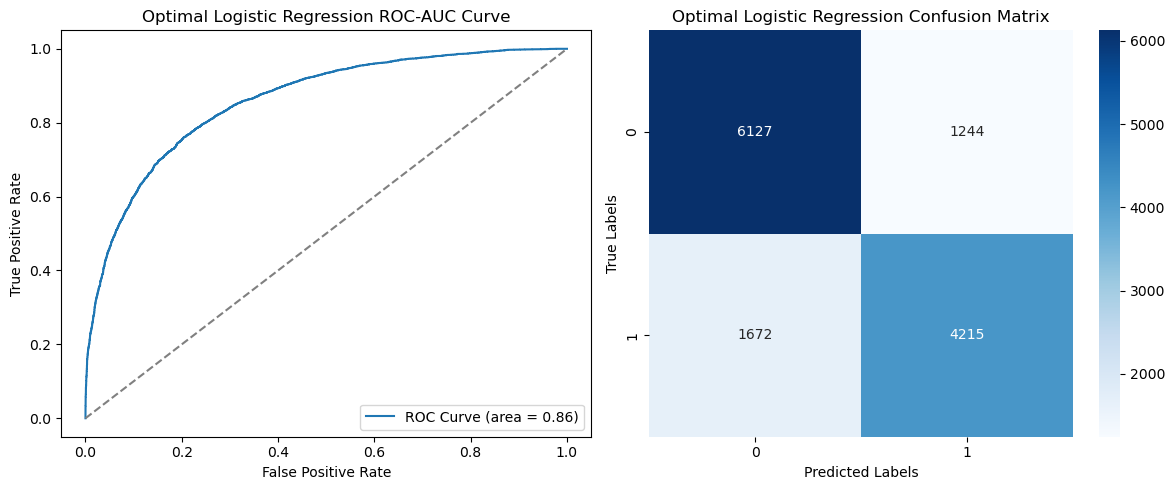

In [56]:
# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [2000], 
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)

# Perform Randomized Search Cross Validation
random_search.fit(X_train, y_train)

# Get best parameters
best_params_logreg = random_search.best_params_
print("Best Hyperparameters:", best_params_logreg)

# Initialize Logistic Regression model with best parameters
optimal_logreg_model = LogisticRegression(random_state=42, **best_params_logreg)

# Train optimal Logistic Regression model
optimal_logreg_model.fit(X_train, y_train)

# Make predictions on test data
optimal_logreg_y_pred = optimal_logreg_model.predict(X_test)
optimal_logreg_y_pred_proba = optimal_logreg_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for optimal model
optimal_logreg_accuracy = accuracy_score(y_test, optimal_logreg_y_pred)
optimal_logreg_precision = precision_score(y_test, optimal_logreg_y_pred)
optimal_logreg_recall = recall_score(y_test, optimal_logreg_y_pred)
optimal_logreg_f1 = f1_score(y_test, optimal_logreg_y_pred)
optimal_logreg_roc_auc = roc_auc_score(y_test, optimal_logreg_y_pred_proba)
optimal_logreg_kappa = cohen_kappa_score(y_test, optimal_logreg_y_pred)
optimal_logreg_conf_matrix = confusion_matrix(y_test, optimal_logreg_y_pred)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_logreg_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_logreg_precision:.4f}")
print(f"Optimal Model Recall: {optimal_logreg_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_logreg_f1:.4f}")
print(f"Optimal Model ROC-AUC Score: {optimal_logreg_roc_auc:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_logreg_kappa:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_logreg_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Optimal Logistic Regression model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
optimal_logreg_fpr, optimal_logreg_tpr, _ = roc_curve(y_test, optimal_logreg_y_pred_proba, pos_label=1)
axes[0].plot(optimal_logreg_fpr, optimal_logreg_tpr, label='ROC Curve (area = {:.2f})'.format(optimal_logreg_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Optimal Logistic Regression ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_logreg_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Optimal Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

#### Decision Tree

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimal Model Accuracy: 0.7679
Optimal Model Precision: 0.7676
Optimal Model Recall: 0.6846
Optimal Model F1 Score: 0.7237
Optimal Model ROC-AUC Score: 0.8435
Optimal Model Cohen's Kappa: 0.5248
Optimal Model Confusion Matrix:
[[6151 1220]
 [1857 4030]]


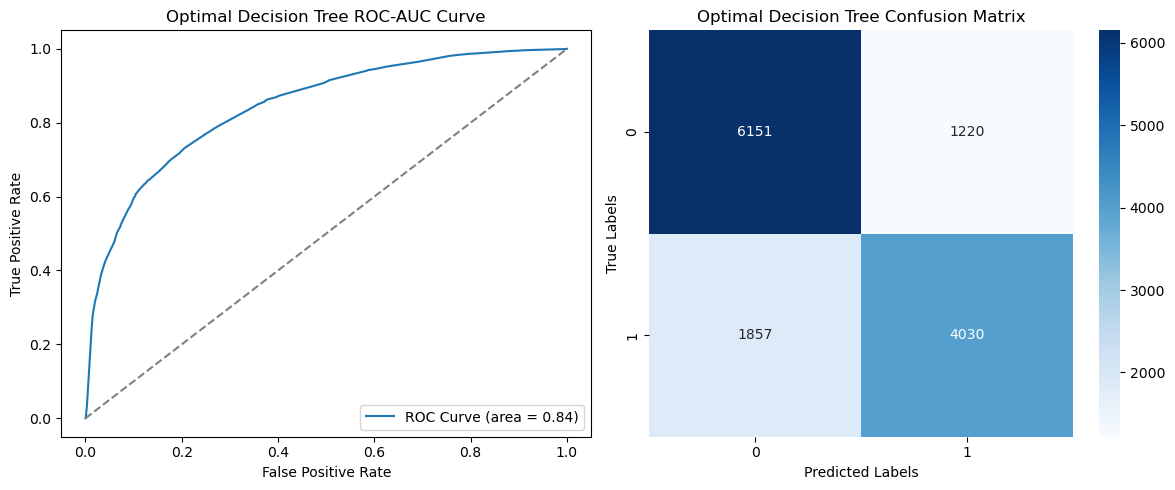

In [58]:
# Define parameter grid for Decision Tree Classifier
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
}

# Initialize Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid=param_grid, cv=3)

# Perform Grid Search Cross Validation
grid_search_dt.fit(X_train, y_train)

# Get best parameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters:", best_params_dt)

# Initialize Decision Tree Classifier model with best parameters
optimal_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)

# Train optimal Decision Tree Classifier model
optimal_dt_model.fit(X_train, y_train)

# Make predictions on test data
optimal_dt_y_pred = optimal_dt_model.predict(X_test)
optimal_dt_y_pred_proba = optimal_dt_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for optimal model
optimal_dt_accuracy = accuracy_score(y_test, optimal_dt_y_pred)
optimal_dt_precision = precision_score(y_test, optimal_dt_y_pred)
optimal_dt_recall = recall_score(y_test, optimal_dt_y_pred)
optimal_dt_f1 = f1_score(y_test, optimal_dt_y_pred)
optimal_dt_roc_auc = roc_auc_score(y_test, optimal_dt_y_pred_proba)
optimal_dt_kappa = cohen_kappa_score(y_test, optimal_dt_y_pred)
optimal_dt_conf_matrix = confusion_matrix(y_test, optimal_dt_y_pred)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_dt_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_dt_precision:.4f}")
print(f"Optimal Model Recall: {optimal_dt_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_dt_f1:.4f}")
print(f"Optimal Model ROC-AUC Score: {optimal_dt_roc_auc:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_dt_kappa:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_dt_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Optimal Decision Tree model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
optimal_dt_fpr, optimal_dt_tpr, _ = roc_curve(y_test, optimal_dt_y_pred_proba, pos_label=1)
axes[0].plot(optimal_dt_fpr, optimal_dt_tpr, label='ROC Curve (area = {:.2f})'.format(optimal_dt_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Optimal Decision Tree ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_dt_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Optimal Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()

#### Random Forest

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
Optimal Model Accuracy: 0.7951
Optimal Model Precision: 0.7840
Optimal Model Recall: 0.7435
Optimal Model F1 Score: 0.7632
Optimal Model ROC-AUC Score: 0.8777
Optimal Model Cohen's Kappa: 0.5829
Optimal Model Confusion Matrix:
[[6165 1206]
 [1510 4377]]


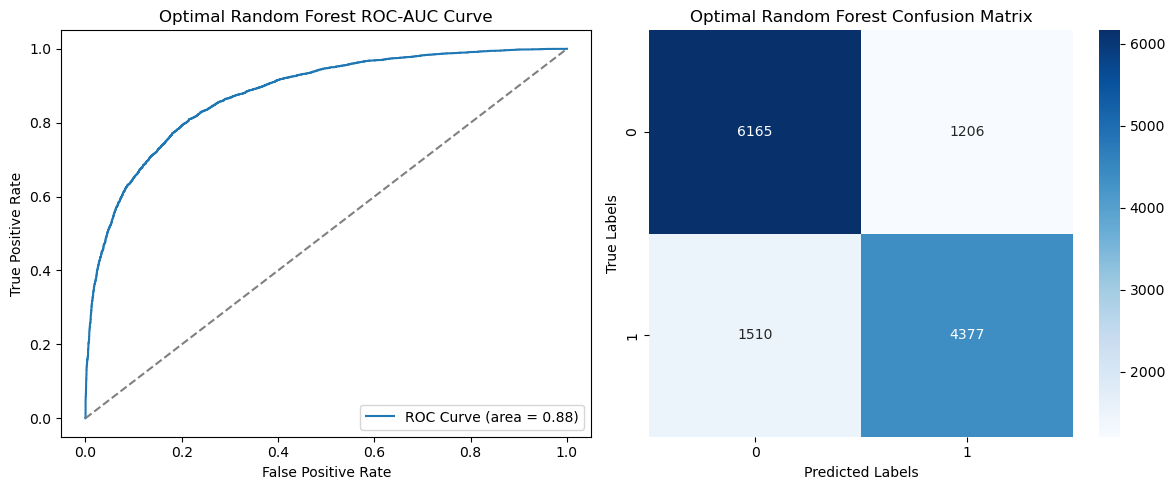

In [69]:
# Define parameter distributions for Random Forest Classifier
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'criterion': ['gini'],
}

# Initialize Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_distributions, cv=3, random_state=42)

# Perform Randomized Search Cross Validation
random_search_rf.fit(X_train, y_train)

# Get best parameters
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# Initialize Random Forest Classifier model with best parameters
optimal_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)

# Train optimal Random Forest Classifier model
optimal_rf_model.fit(X_train, y_train)

# Make predictions on test data
optimal_rf_y_pred = optimal_rf_model.predict(X_test)
optimal_rf_y_pred_proba = optimal_rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for optimal model
optimal_rf_accuracy = accuracy_score(y_test, optimal_rf_y_pred)
optimal_rf_precision = precision_score(y_test, optimal_rf_y_pred)
optimal_rf_recall = recall_score(y_test, optimal_rf_y_pred)
optimal_rf_f1 = f1_score(y_test, optimal_rf_y_pred)
optimal_rf_roc_auc = roc_auc_score(y_test, optimal_rf_y_pred_proba)
optimal_rf_kappa = cohen_kappa_score(y_test, optimal_rf_y_pred)
optimal_rf_conf_matrix = confusion_matrix(y_test, optimal_rf_y_pred)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_rf_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_rf_precision:.4f}")
print(f"Optimal Model Recall: {optimal_rf_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_rf_f1:.4f}")
print(f"Optimal Model ROC-AUC Score: {optimal_rf_roc_auc:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_rf_kappa:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_rf_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Optimal Random Forest model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
optimal_rf_fpr, optimal_rf_tpr, _ = roc_curve(y_test, optimal_rf_y_pred_proba, pos_label=1)
axes[0].plot(optimal_rf_fpr, optimal_rf_tpr, label='ROC Curve (area = {:.2f})'.format(optimal_rf_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Optimal Random Forest ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_rf_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Optimal Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

#### GBM

Best Hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15}
Optimal Model Accuracy: 0.7975
Optimal Model Precision: 0.7898
Optimal Model Recall: 0.7411
Optimal Model F1 Score: 0.7647
Optimal Model ROC-AUC Score: 0.8759
Optimal Model Cohen's Kappa: 0.5873
Optimal Model Confusion Matrix:
[[6210 1161]
 [1524 4363]]


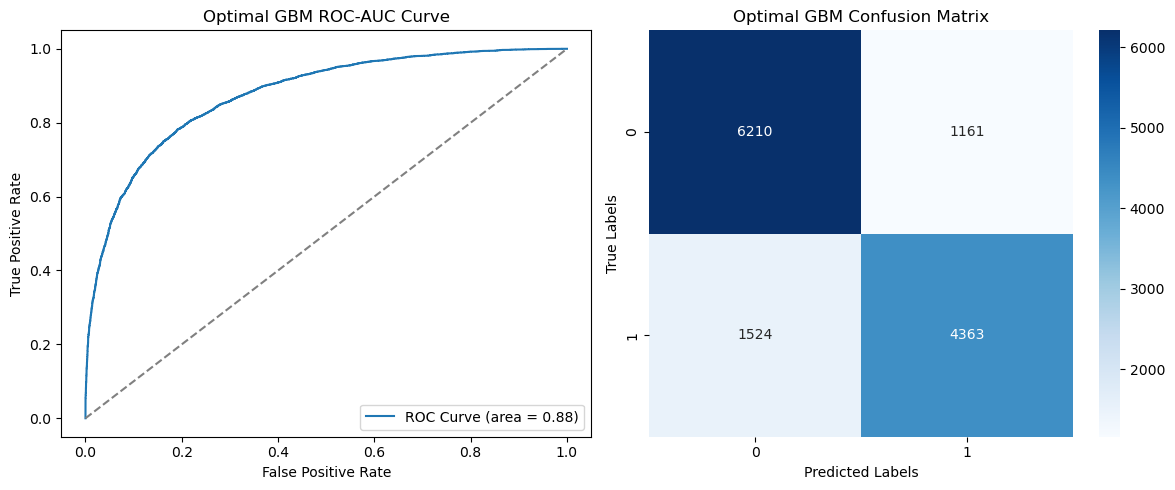

In [59]:
# Define the reduced parameter grid for GBM
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

# Initialize GBM Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(gbm, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)

# Perform Randomized Search Cross Validation
random_search_gbm.fit(X_train, y_train)

# Get best parameters
best_params_gbm = random_search_gbm.best_params_
print("Best Hyperparameters:", best_params_gbm)

# Initialize GBM Classifier with best parameters
optimal_gbm_model = GradientBoostingClassifier(random_state=42, **best_params_gbm)

# Train optimal GBM Classifier model
optimal_gbm_model.fit(X_train, y_train)

# Make predictions on test data
optimal_gbm_y_pred = optimal_gbm_model.predict(X_test)
optimal_gbm_y_pred_proba = optimal_gbm_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for optimal model
optimal_gbm_accuracy = accuracy_score(y_test, optimal_gbm_y_pred)
optimal_gbm_precision = precision_score(y_test, optimal_gbm_y_pred)
optimal_gbm_recall = recall_score(y_test, optimal_gbm_y_pred)
optimal_gbm_f1 = f1_score(y_test, optimal_gbm_y_pred)
optimal_gbm_roc_auc = roc_auc_score(y_test, optimal_gbm_y_pred_proba)
optimal_gbm_kappa = cohen_kappa_score(y_test, optimal_gbm_y_pred)
optimal_gbm_conf_matrix = confusion_matrix(y_test, optimal_gbm_y_pred)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_gbm_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_gbm_precision:.4f}")
print(f"Optimal Model Recall: {optimal_gbm_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_gbm_f1:.4f}")
print(f"Optimal Model ROC-AUC Score: {optimal_gbm_roc_auc:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_gbm_kappa:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_gbm_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Optimal GBM model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
optimal_gbm_fpr, optimal_gbm_tpr, _ = roc_curve(y_test, optimal_gbm_y_pred_proba, pos_label=1)
axes[0].plot(optimal_gbm_fpr, optimal_gbm_tpr, label='ROC Curve (area = {:.2f})'.format(optimal_gbm_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Optimal GBM ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_gbm_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Optimal GBM Confusion Matrix')

plt.tight_layout()
plt.show()

#### Ada Boost Classifier

Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Optimal Model Accuracy: 0.7836
Optimal Model Precision: 0.7804
Optimal Model Recall: 0.7134
Optimal Model F1 Score: 0.7454
Optimal Model ROC-AUC Score: 0.8617
Optimal Model Cohen's Kappa: 0.5579
Optimal Model Confusion Matrix:
[[6189 1182]
 [1687 4200]]


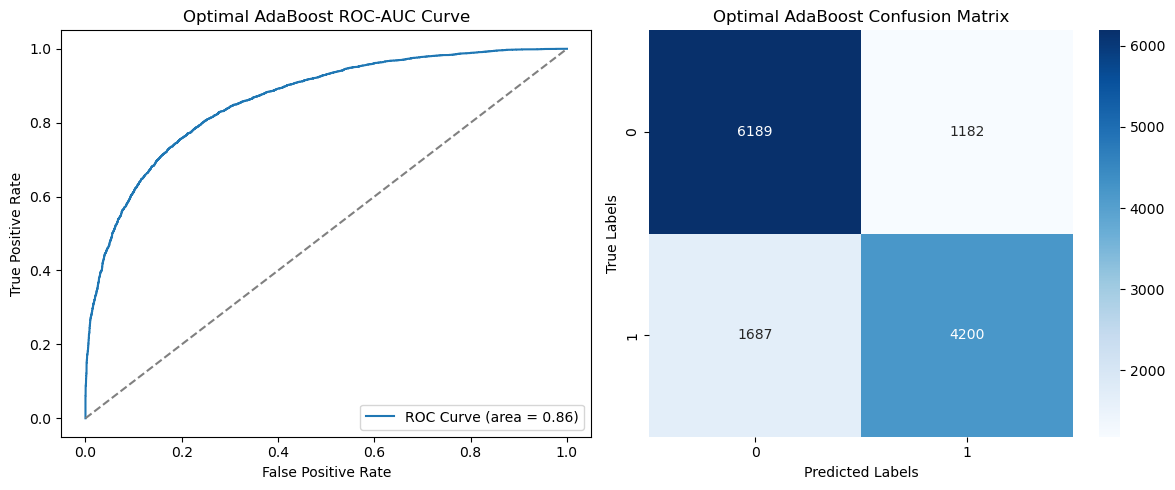

In [60]:
# Define the parameter grid for AdaBoost Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initialize AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_adaboost = RandomizedSearchCV(adaboost, param_distributions=param_grid, n_iter=20, cv=3, random_state=42)

# Perform Randomized Search Cross Validation
random_search_adaboost.fit(X_train, y_train)

# Get best parameters
best_params_adaboost = random_search_adaboost.best_params_
print("Best Hyperparameters:", best_params_adaboost)

# Initialize AdaBoost Classifier with best parameters
optimal_adaboost_model = AdaBoostClassifier(random_state=42, **best_params_adaboost)

# Train optimal AdaBoost Classifier model
optimal_adaboost_model.fit(X_train, y_train)

# Make predictions on test data
optimal_adaboost_y_pred = optimal_adaboost_model.predict(X_test)
optimal_adaboost_y_pred_proba = optimal_adaboost_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for optimal model
optimal_adaboost_accuracy = accuracy_score(y_test, optimal_adaboost_y_pred)
optimal_adaboost_precision = precision_score(y_test, optimal_adaboost_y_pred)
optimal_adaboost_recall = recall_score(y_test, optimal_adaboost_y_pred)
optimal_adaboost_f1 = f1_score(y_test, optimal_adaboost_y_pred)
optimal_adaboost_roc_auc = roc_auc_score(y_test, optimal_adaboost_y_pred_proba)
optimal_adaboost_kappa = cohen_kappa_score(y_test, optimal_adaboost_y_pred)
optimal_adaboost_conf_matrix = confusion_matrix(y_test, optimal_adaboost_y_pred)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_adaboost_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_adaboost_precision:.4f}")
print(f"Optimal Model Recall: {optimal_adaboost_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_adaboost_f1:.4f}")
print(f"Optimal Model ROC-AUC Score: {optimal_adaboost_roc_auc:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_adaboost_kappa:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_adaboost_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Optimal AdaBoost model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
optimal_adaboost_fpr, optimal_adaboost_tpr, _ = roc_curve(y_test, optimal_adaboost_y_pred_proba, pos_label=1)
axes[0].plot(optimal_adaboost_fpr, optimal_adaboost_tpr, label='ROC Curve (area = {:.2f})'.format(optimal_adaboost_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Optimal AdaBoost ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_adaboost_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Optimal AdaBoost Confusion Matrix')

plt.tight_layout()
plt.show()


#### Guassian NB

In [61]:
# No hyper parameters for Guassian NB

#### Extra Trees Classifier

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Optimal Model Accuracy: 0.7936
Optimal Model Precision: 0.7833
Optimal Model Recall: 0.7399
Optimal Model F1 Score: 0.7610
Optimal Model Cohen's Kappa: 0.5797
Optimal Model Confusion Matrix:
[[6166 1205]
 [1531 4356]]


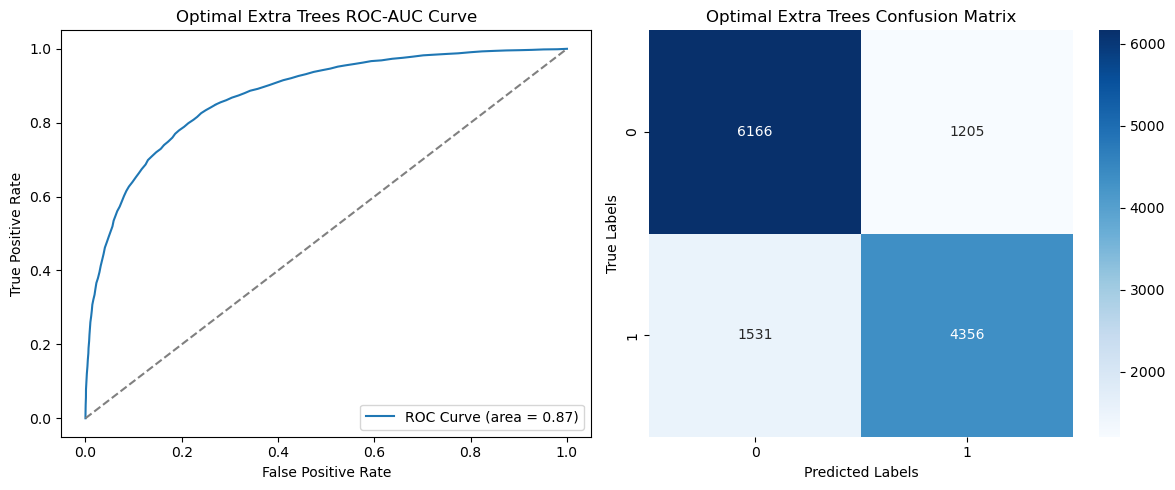

In [64]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False]
}


# Initialize Extra Trees Classifier model
et_model = ExtraTreesClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_et = RandomizedSearchCV(et_model, param_distributions=param_grid, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Perform Randomized Search Cross Validation
random_search_et.fit(X_train, y_train)

# Get best parameters
best_params_et = random_search_et.best_params_
print("Best Hyperparameters:", best_params_et)

# Initialize Extra Trees Classifier model with best parameters
optimal_et_model = ExtraTreesClassifier(random_state=42, **best_params_et)

# Train optimal Extra Trees Classifier model
optimal_et_model.fit(X_train, y_train)

# Make predictions on test data
optimal_et_y_pred = optimal_et_model.predict(X_test)
optimal_et_y_pred_proba = optimal_et_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for optimal model
optimal_et_accuracy = accuracy_score(y_test, optimal_et_y_pred)
optimal_et_precision = precision_score(y_test, optimal_et_y_pred)
optimal_et_recall = recall_score(y_test, optimal_et_y_pred)
optimal_et_f1 = f1_score(y_test, optimal_et_y_pred)
optimal_et_kappa = cohen_kappa_score(y_test, optimal_et_y_pred)
optimal_et_conf_matrix = confusion_matrix(y_test, optimal_et_y_pred)

# Calculate ROC-AUC score for optimal model
optimal_et_roc_auc = roc_auc_score(y_test, optimal_et_y_pred_proba)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_et_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_et_precision:.4f}")
print(f"Optimal Model Recall: {optimal_et_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_et_f1:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_et_kappa:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_et_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Optimal Extra Trees model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
optimal_et_fpr, optimal_et_tpr, _ = roc_curve(y_test, optimal_et_y_pred_proba, pos_label=1)
axes[0].plot(optimal_et_fpr, optimal_et_tpr, label='ROC Curve (area = {:.2f})'.format(optimal_et_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Optimal Extra Trees ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_et_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Optimal Extra Trees Confusion Matrix')

plt.tight_layout()
plt.show()

#### Cat Boost

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'border_count': 73, 'depth': 10, 'iterations': 150, 'l2_leaf_reg': 5, 'learning_rate': 0.15}
Optimal Model Accuracy: 0.7979
Optimal Model Precision: 0.7885
Optimal Model Recall: 0.7447
Optimal Model F1 Score: 0.7660
Optimal Model Cohen's Kappa: 0.5884
Optimal Model ROC-AUC Score: 0.8785
Optimal Model Confusion Matrix:
[[6195 1176]
 [1503 4384]]


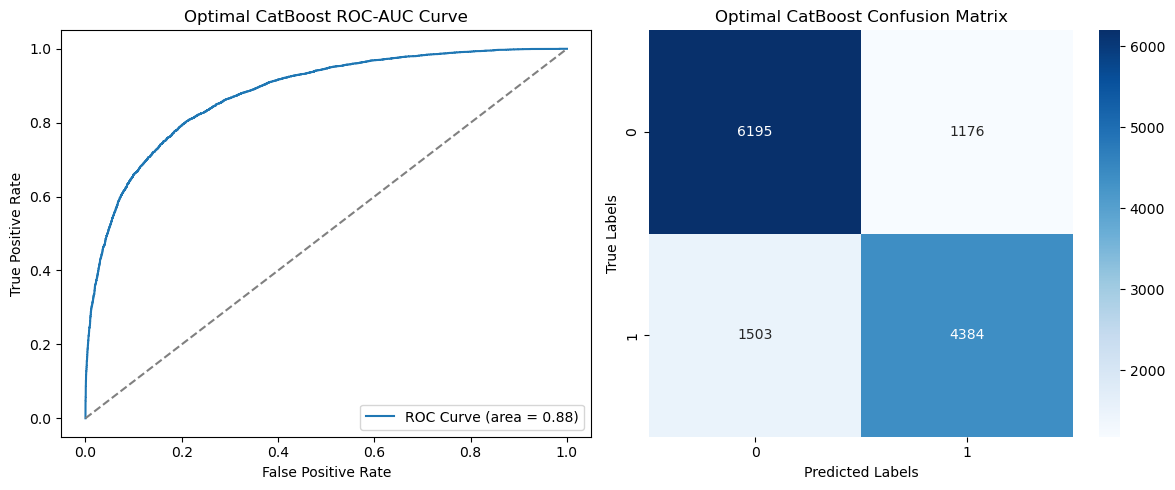

In [66]:
# Initialize CatBoost model with early stopping
catboost_model = CatBoostClassifier(random_seed=42, verbose=0, early_stopping_rounds=20)

# Define a larger parameter grid with more options
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'depth': [6, 8, 10],
    'iterations': [100, 150, 200],
    'l2_leaf_reg': [3, 5, 7],
    'border_count': randint(32, 128)  # New hyperparameter with a range
}

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search_catboost = RandomizedSearchCV(
    catboost_model, 
    param_distributions=param_grid, 
    n_iter=20, 
    cv=5, 
    verbose=2, 
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform Randomized Search Cross Validation
random_search_catboost.fit(X_train, y_train, eval_set=(X_test, y_test))

# Get best parameters
best_params_catboost = random_search_catboost.best_params_
print("Best Hyperparameters:", best_params_catboost)

# Initialize CatBoost Classifier model with best parameters and train
optimal_catboost_model = CatBoostClassifier(random_seed=42, verbose=0, **best_params_catboost)
optimal_catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions on test data
optimal_catboost_y_pred_proba = optimal_catboost_model.predict_proba(X_test)[:, 1]
optimal_catboost_y_pred = optimal_catboost_model.predict(X_test)

# Calculate evaluation metrics for optimal model
optimal_catboost_accuracy = accuracy_score(y_test, optimal_catboost_y_pred)
optimal_catboost_precision = precision_score(y_test, optimal_catboost_y_pred)
optimal_catboost_recall = recall_score(y_test, optimal_catboost_y_pred)
optimal_catboost_f1 = f1_score(y_test, optimal_catboost_y_pred)
optimal_catboost_kappa = cohen_kappa_score(y_test, optimal_catboost_y_pred)
optimal_catboost_conf_matrix = confusion_matrix(y_test, optimal_catboost_y_pred)

# Calculate ROC-AUC score for optimal model
optimal_catboost_roc_auc = roc_auc_score(y_test, optimal_catboost_y_pred_proba)

# Print evaluation metrics for optimal model
print(f"Optimal Model Accuracy: {optimal_catboost_accuracy:.4f}")
print(f"Optimal Model Precision: {optimal_catboost_precision:.4f}")
print(f"Optimal Model Recall: {optimal_catboost_recall:.4f}")
print(f"Optimal Model F1 Score: {optimal_catboost_f1:.4f}")
print(f"Optimal Model Cohen's Kappa: {optimal_catboost_kappa:.4f}")
print(f"Optimal Model ROC-AUC Score: {optimal_catboost_roc_auc:.4f}")
print("Optimal Model Confusion Matrix:")
print(optimal_catboost_conf_matrix)

# Plot ROC-AUC curve and confusion matrix side by side for Optimal CatBoost model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC-AUC curve
optimal_catboost_fpr, optimal_catboost_tpr, _ = roc_curve(y_test, optimal_catboost_y_pred_proba, pos_label=1)
axes[0].plot(optimal_catboost_fpr, optimal_catboost_tpr, label='ROC Curve (area = {:.2f})'.format(optimal_catboost_roc_auc))
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Optimal CatBoost ROC-AUC Curve')
axes[0].legend(loc='lower right')

# Plot confusion matrix
sns.heatmap(optimal_catboost_conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Optimal CatBoost Confusion Matrix')

plt.tight_layout()
plt.show()

### Summary

In [71]:
from tabulate import tabulate

# Define the data for the table
hyper_data = [
    ["MLP Classifier", optimal_accuracy, optimal_precision, optimal_recall, optimal_f1, optimal_roc_auc, optimal_kappa],
    ["Logistic Regression", optimal_logreg_accuracy, optimal_logreg_precision, optimal_logreg_recall, optimal_logreg_f1, optimal_logreg_roc_auc, optimal_logreg_kappa],
    ["Decision Tree Classifier", optimal_dt_accuracy, optimal_dt_precision, optimal_dt_recall, optimal_dt_f1, optimal_dt_roc_auc, optimal_dt_kappa],
    ["Random Forest Classifier", optimal_rf_accuracy, optimal_rf_precision, optimal_rf_recall, optimal_rf_f1, optimal_rf_roc_auc, optimal_rf_kappa],
    ["Gradient Boosting Classifier", optimal_gbm_accuracy, optimal_gbm_precision, optimal_gbm_recall, optimal_gbm_f1, optimal_gbm_roc_auc, optimal_gbm_kappa],
    ["AdaBoost Classifier", optimal_adaboost_accuracy, optimal_adaboost_precision, optimal_adaboost_recall, optimal_adaboost_f1, optimal_adaboost_roc_auc, optimal_adaboost_kappa],
    ["Extra Trees Classifier", optimal_et_accuracy, optimal_et_precision, optimal_et_recall, optimal_et_f1, optimal_et_roc_auc, optimal_et_kappa],
    ["CatBoost Classifier", optimal_catboost_accuracy, optimal_catboost_precision, optimal_catboost_recall, optimal_catboost_f1, optimal_catboost_roc_auc, optimal_catboost_kappa]
]

# Define the headers for the table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "Cohen's Kappa"]

# Print the summary table with fancy_grid style
print(tabulate(hyper_data, headers=headers, tablefmt="fancy_grid"))


╒══════════════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╤═════════════════╕
│ Model                        │   Accuracy │   Precision │   Recall │   F1 Score │   ROC-AUC │   Cohen's Kappa │
╞══════════════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╪═════════════════╡
│ MLP Classifier               │   0.790994 │    0.795748 │ 0.712077 │   0.751591 │  0.871355 │        0.572156 │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┼─────────────────┤
│ Logistic Regression          │   0.780057 │    0.772119 │ 0.715984 │   0.742993 │  0.858767 │        0.551249 │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┼─────────────────┤
│ Decision Tree Classifier     │   0.767914 │    0.767619 │ 0.684559 │   0.723714 │  0.843516 │        0.524762 │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────

#### Comparison

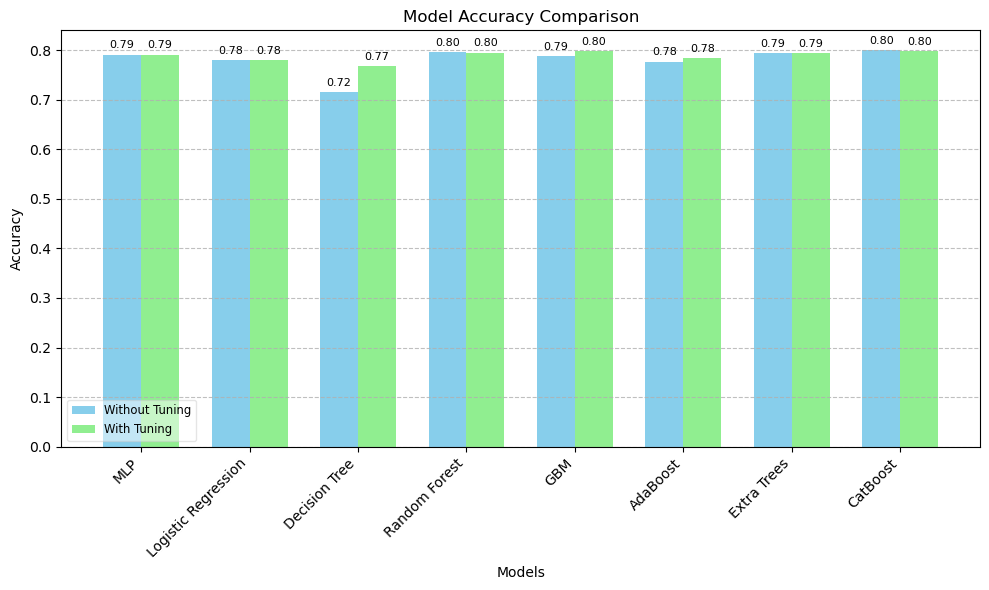

In [94]:
# Accuracy scores for each model with and without hyperparameter tuning
models = ['MLP', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'GBM', 'AdaBoost', 'Extra Trees', 'CatBoost']
accuracy_scores_without_tuning = [mlp_accuracy, logreg_accuracy, dt_accuracy, rf_accuracy, gbm_accuracy, adaboost_accuracy, extratrees_accuracy, accuracy]
accuracy_scores_with_tuning = [optimal_accuracy, optimal_logreg_accuracy, optimal_dt_accuracy, optimal_rf_accuracy, optimal_gbm_accuracy, optimal_adaboost_accuracy, optimal_et_accuracy, optimal_catboost_accuracy]

x = np.arange(len(models))  
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_scores_without_tuning, width, label='Without Tuning', color='skyblue')
rects2 = ax.bar(x + width/2, accuracy_scores_with_tuning, width, label='With Tuning', color='lightgreen')

# Grid lines
ax.grid(axis='y', linestyle='--', alpha=0.8)

# Labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')


ax.legend(loc='lower left', fontsize='small', framealpha=0.5)

# Numeric values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),  
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, color='black') 

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


# Explainable AI

In [46]:
# Define column names based on your feature names
feature_names = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                 'WindGustSpeed', 'WindSpeed9am', 'Humidity9am', 'Humidity3pm',
                 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
                 'RainToday']

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                        mode='classification',
                                                        training_labels=y_train,
                                                        feature_names=feature_names)

# Choose a specific instance for explanation (e.g., the first instance in the test set)
instance_idx = 0
exp_lime = explainer_lime.explain_instance(X_test[instance_idx],  # assuming X_test is a NumPy array
                                           rf_model.predict_proba,
                                           num_features=len(feature_names))

# Show LIME explanation
exp_lime.show_in_notebook()